In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#Load the dataset

In [3]:
ap_df = pd.read_csv("application_data.csv")

#Inspect the dataset

In [4]:
ap_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
ap_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
ap_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [7]:
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#Checking for missing values 

In [8]:
null_value_percentage = round(ap_df.isnull().mean()*100,2)
print(null_value_percentage)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64


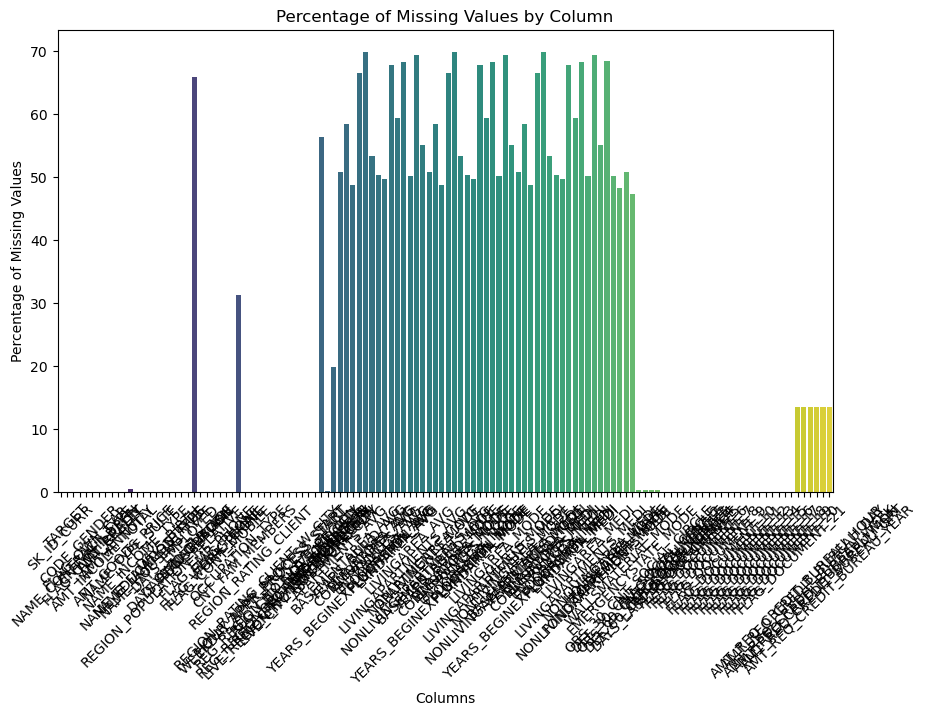

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=null_value_percentage.index, y=null_value_percentage.values, palette="viridis")
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.xticks(rotation=45)
plt.show()

In [10]:
columns_with_high_missing = null_value_percentage[null_value_percentage > 40]
columns_with_high_missing

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [11]:
len(columns_with_high_missing)

49

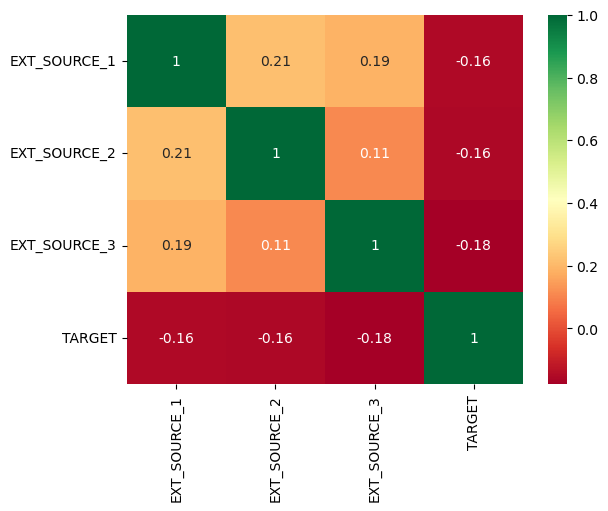

In [12]:
Source = ap_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [13]:
unwanted_ap = columns_with_high_missing.index.tolist() + ['EXT_SOURCE_2', 'EXT_SOURCE_3']

In [14]:
col_Doc = [ 
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

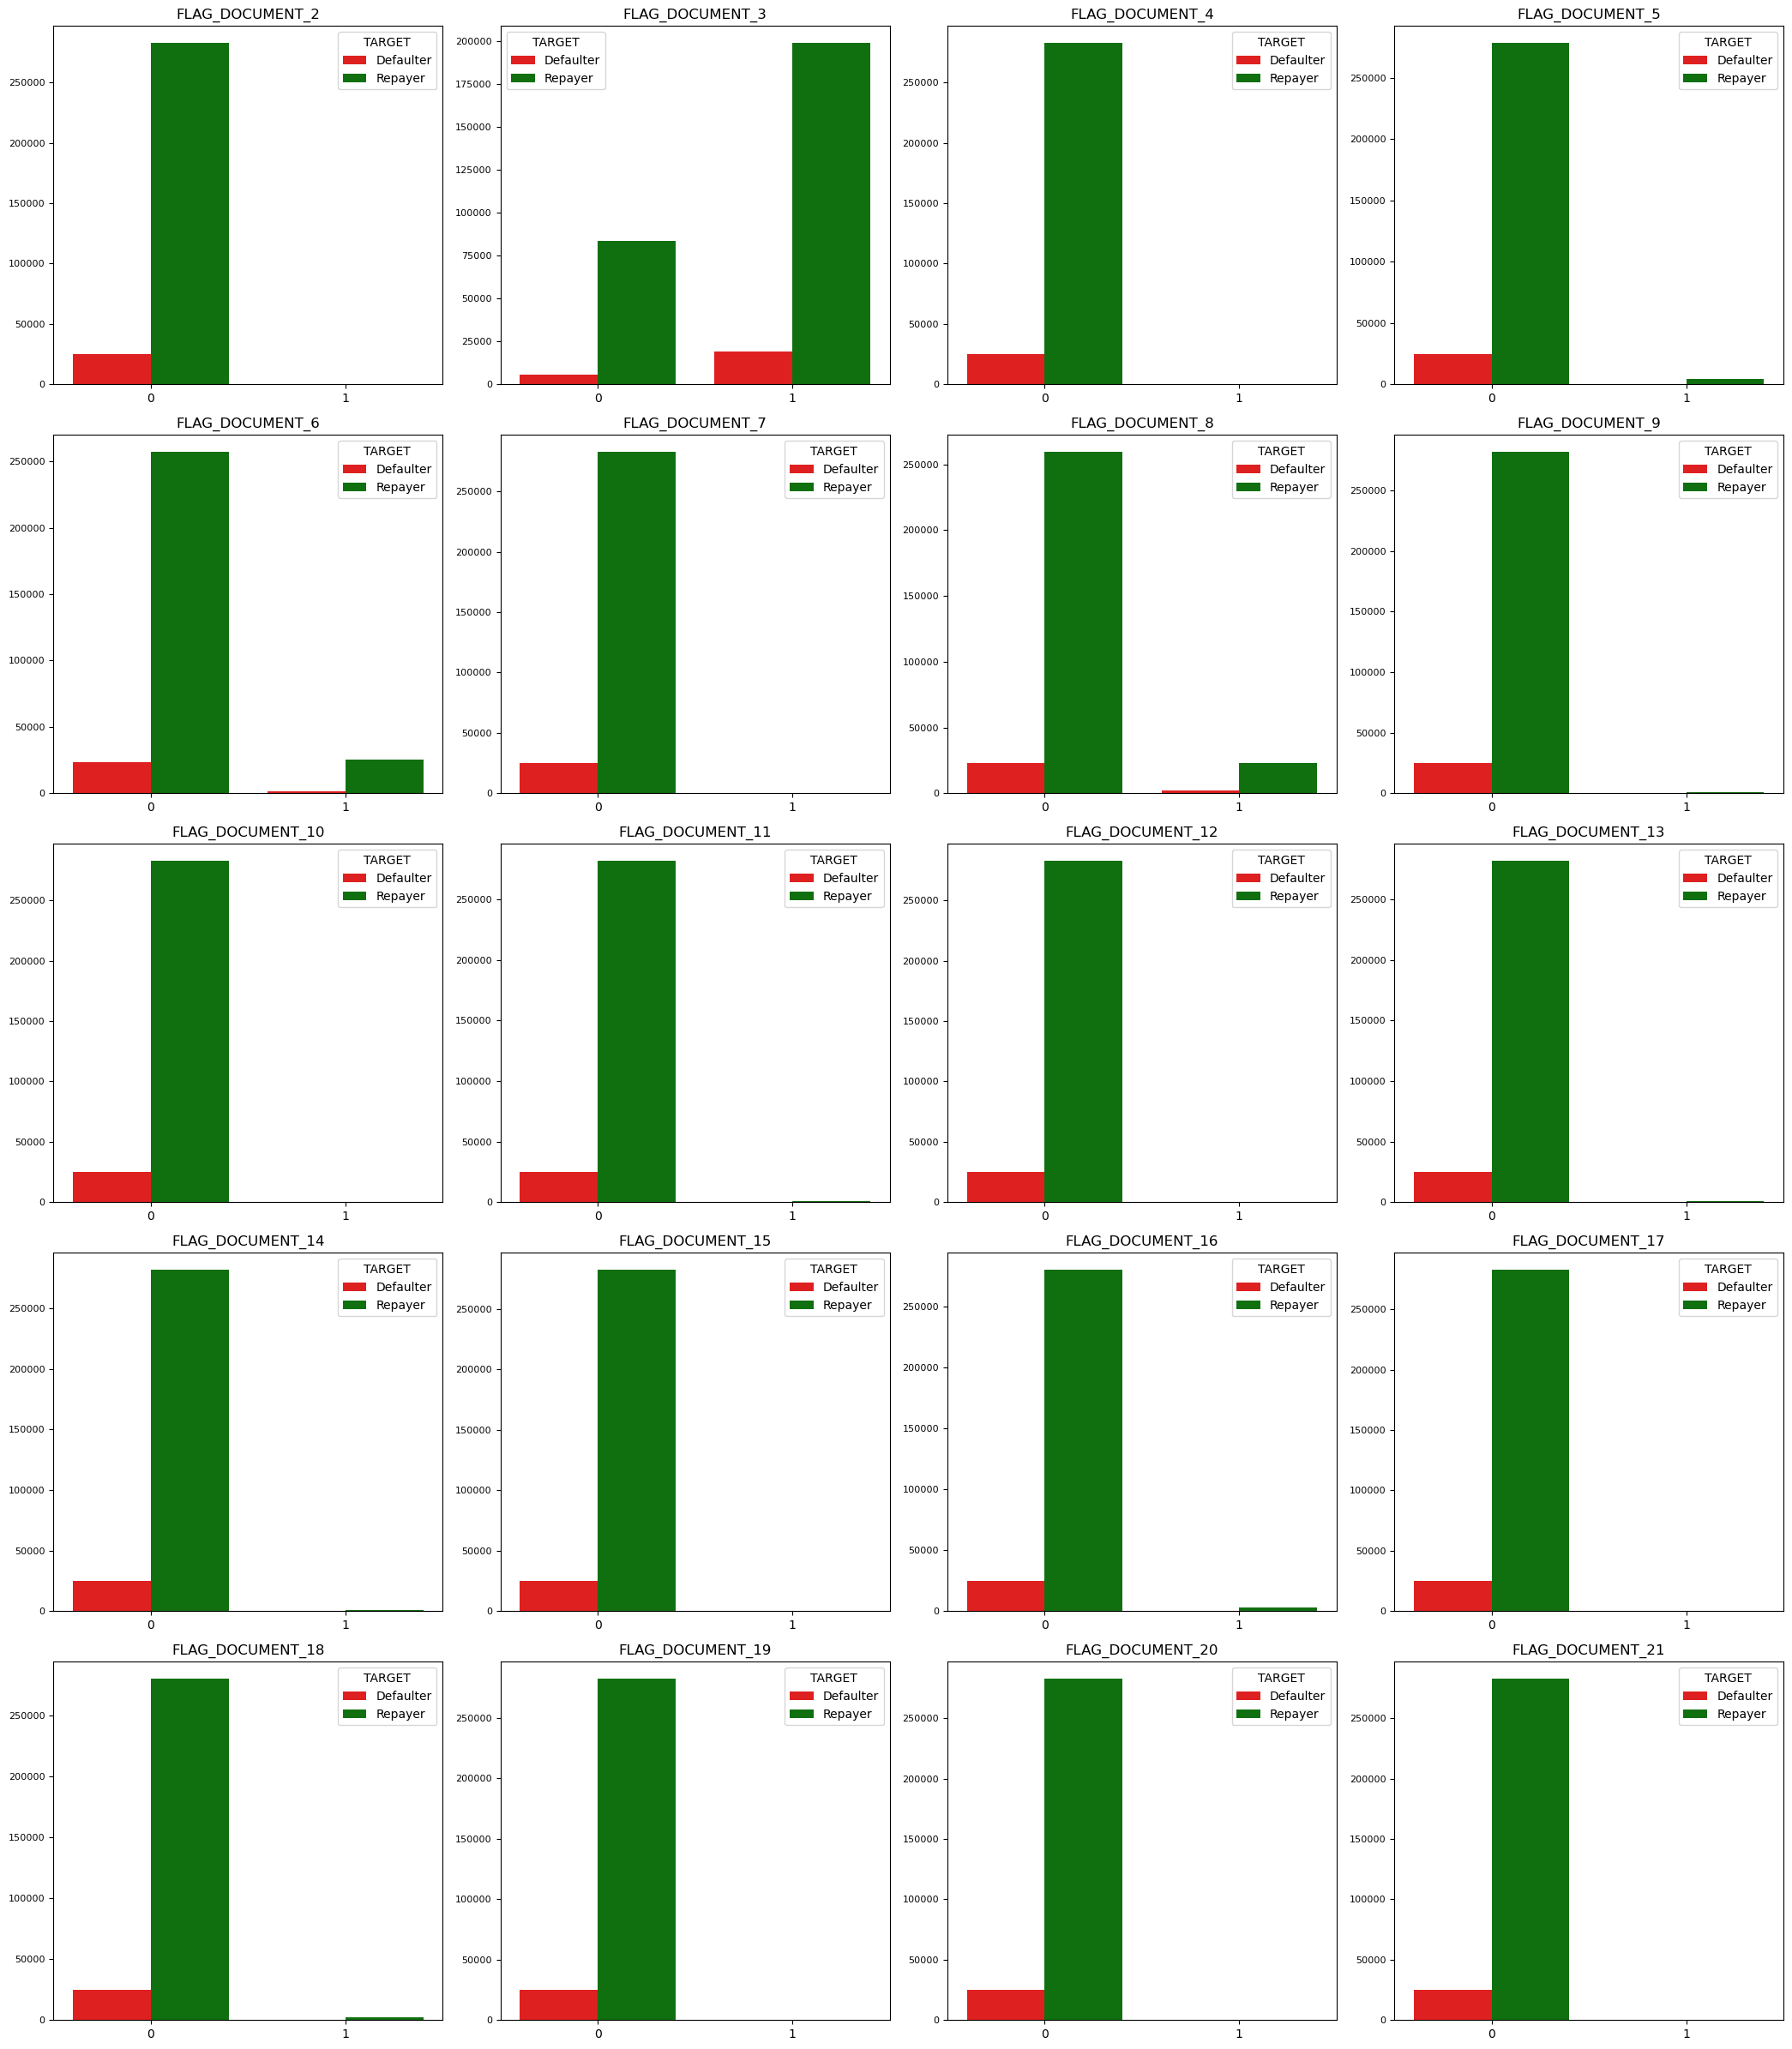

In [15]:
import itertools
df_flag = ap_df[col_Doc + ["TARGET"]].copy()

# Replace the TARGET values for better readability
df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

fig = plt.figure(figsize=(21, 24))

# Use zip_longest to ensure that the iteration works even if the lists have different lengths
for i, j in itertools.zip_longest(col_Doc, range(len(col_Doc))):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(x=df_flag[i], hue=df_flag["TARGET"], palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [16]:
col_Doc.remove('FLAG_DOCUMENT_3')
unwanted_ap =unwanted_ap + col_Doc

In [17]:
len(unwanted_ap)

70

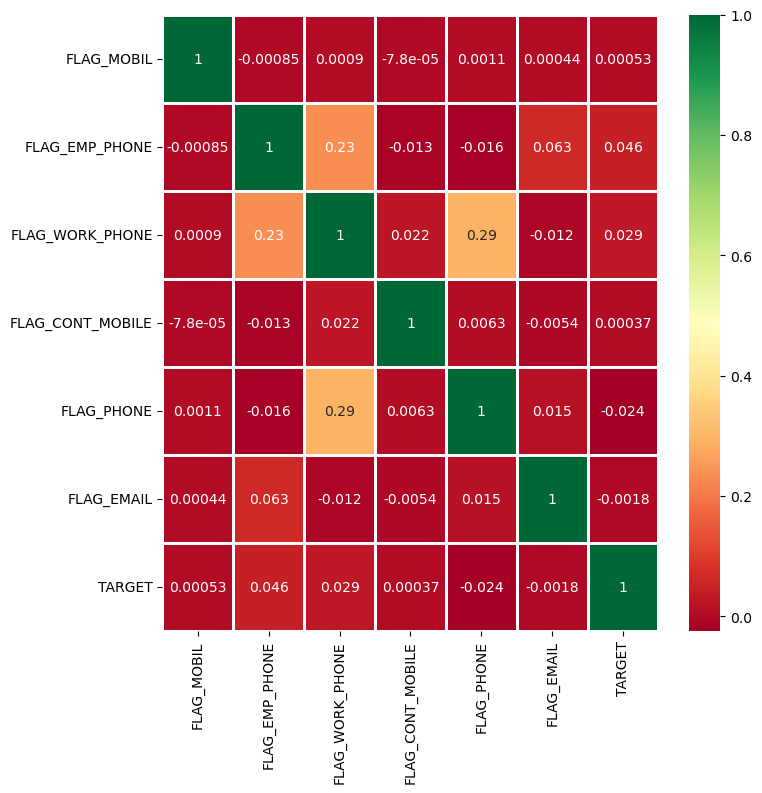

In [18]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = ap_df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

In [19]:
contact_col.remove('TARGET')
unwanted_ap = unwanted_ap + contact_col

In [20]:
len(unwanted_ap)

76

In [21]:
# Dropping the unnecessary columns
ap_df.drop(labels=unwanted_ap,axis=1,inplace=True)

In [22]:
ap_df.shape

(307511, 46)

In [23]:
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [24]:
ap_df.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_3                     2
LIVE_REGION_NOT_WORK_REGION         2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN

Data standardization :-
There are some columns which represent number of days but have some negative values. We need to fix that by replacing those values with their respective absolute values.

In [25]:
ap_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [26]:
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# Replace the values with their respective absolute values
for i in col_list:
    ap_df[i] = abs(ap_df[i])

# Verify the changes
ap_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

In [27]:
ap_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [28]:
#Replace 'XNA' with NaN in the 'CODE_GENDER' column
ap_df['CODE_GENDER'] = ap_df['CODE_GENDER'].replace('XNA', np.nan)
# Find the most frequent value in the 'CODE_GENDER' column
most_frequent_gender = ap_df['CODE_GENDER'].mode()[0]
# Impute with the most frequent value
ap_df['CODE_GENDER'].fillna(most_frequent_gender,inplace = True)

In [29]:
ap_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

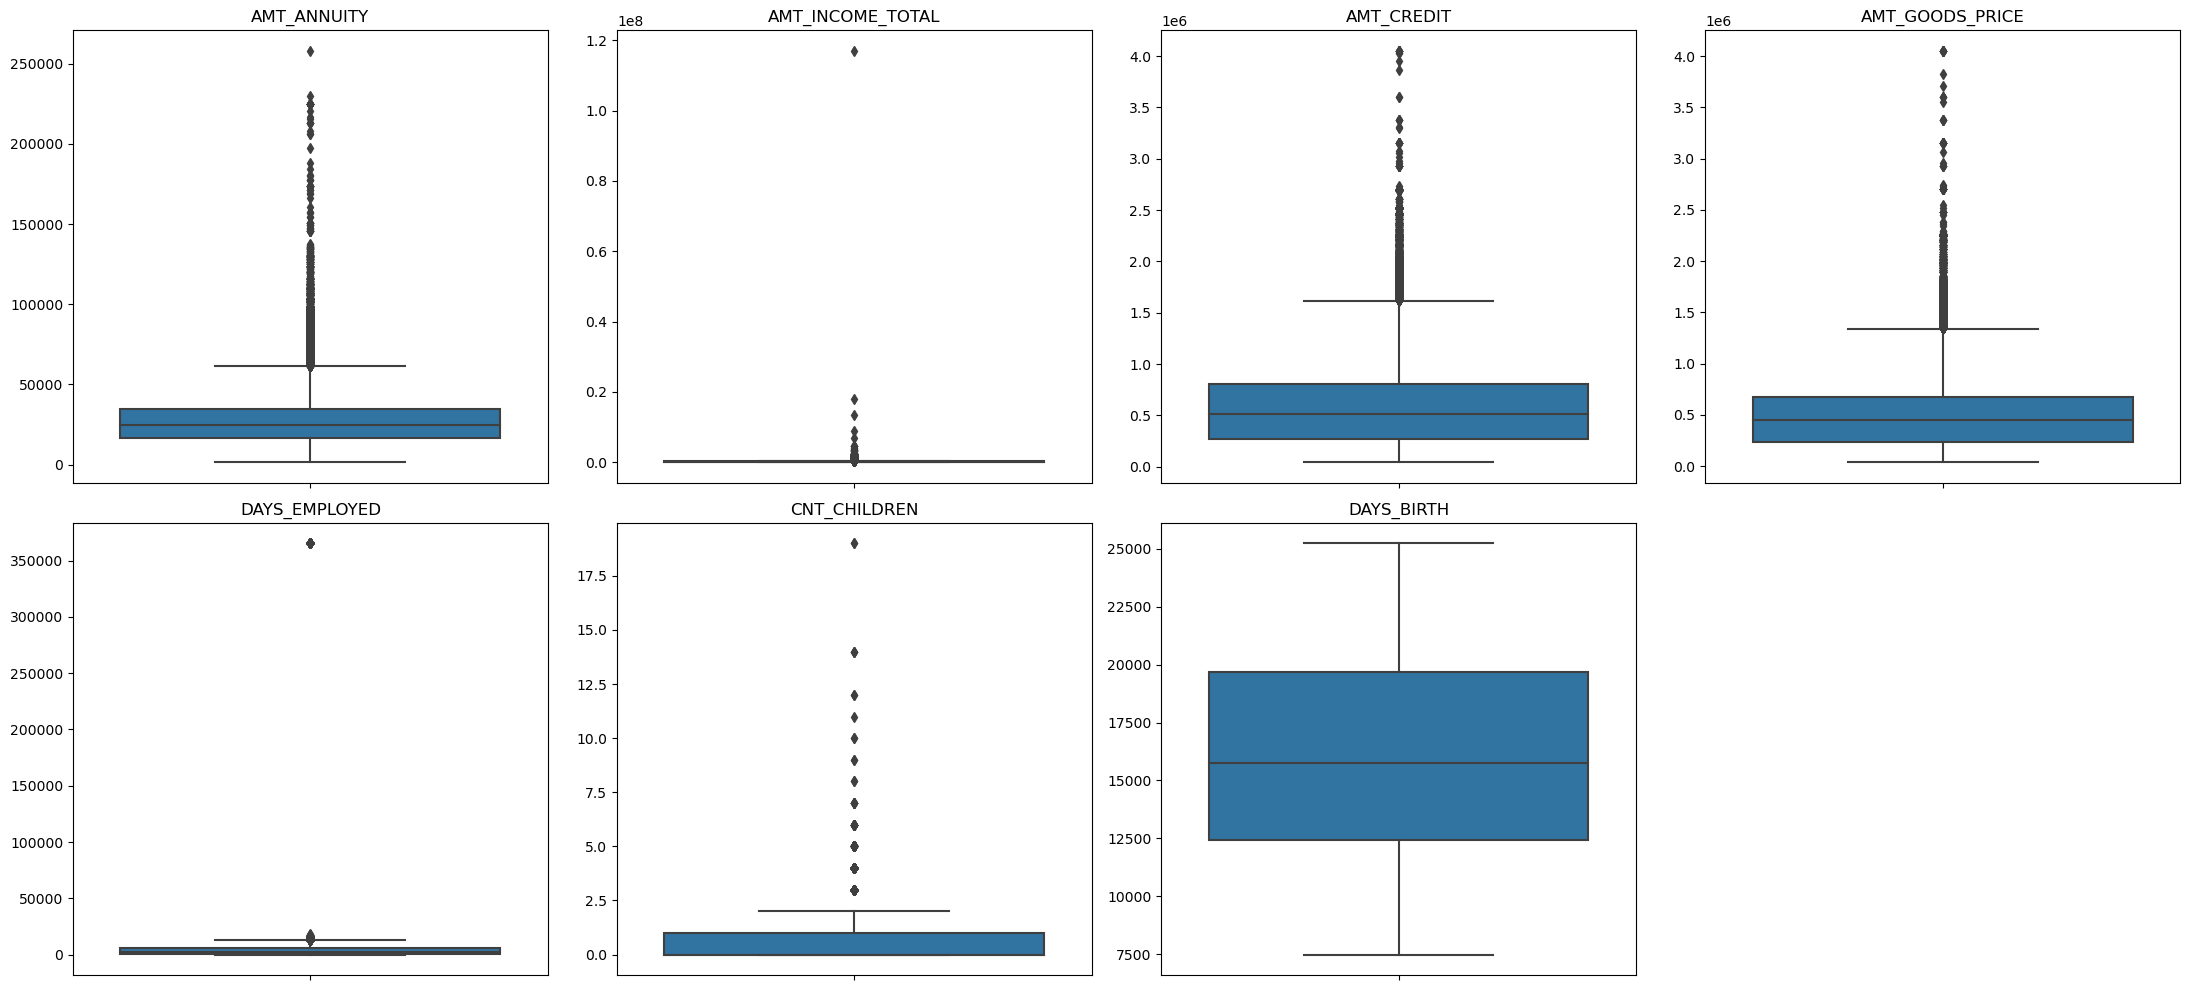

In [30]:
# Define the columns to check for outliers
app_outlier_col_1 = ['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN', 'DAYS_BIRTH']

# Set up the figure
plt.figure(figsize=(22, 10))

# Plot boxplots for the first set of columns
for i, col in enumerate(app_outlier_col_1):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=ap_df[col])
    plt.title(col)
    plt.ylabel("")

# Plot boxplots for the second set of columns
for i, col in enumerate(app_outlier_col_2):
    plt.subplot(2, 4, i + 6)
    sns.boxplot(y=ap_df[col])
    plt.title(col)
    plt.ylabel("")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [31]:
ap_df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED','CNT_CHILDREN', 'DAYS_BIRTH']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE  \
count  307499.000000      3.075110e+05  3.075110e+05     3.072330e+05   
mean    27108.573909      1.687979e+05  5.990260e+05     5.383962e+05   
std     14493.737315      2.371231e+05  4.024908e+05     3.694465e+05   
min      1615.500000      2.565000e+04  4.500000e+04     4.050000e+04   
25%     16524.000000      1.125000e+05  2.700000e+05     2.385000e+05   
50%     24903.000000      1.471500e+05  5.135310e+05     4.500000e+05   
75%     34596.000000      2.025000e+05  8.086500e+05     6.795000e+05   
max    258025.500000      1.170000e+08  4.050000e+06     4.050000e+06   

       DAYS_EMPLOYED   CNT_CHILDREN     DAYS_BIRTH  
count  307511.000000  307511.000000  307511.000000  
mean    67724.742149       0.417052   16036.995067  
std    139443.751806       0.722121    4363.988632  
min         0.000000       0.000000    7489.000000  
25%       933.000000       0.000000   12413.000000  
50%      2219.000000       0.000000   15750.000000  
75%      5707.000000       1.000000   19682.000000  
max    365243.000000      19.000000   25229.000000

#now we will handle outliers by imputing the outliers with median

In [32]:
columns_to_check = [
    'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION'
]
# Function to impute outliers with the median
def impute_outliers(df, columns, strategy='median'):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        if strategy == 'median':
            replacement = df[col].median()
        else:
            raise ValueError("Strategy not supported")
        
        # Apply the replacement
        df[col] = df[col].apply(lambda x: replacement if (x < lower_bound or x > upper_bound) else x)
    
    return df

# Impute outliers in the specified columns using the median
ap_df_imputed = impute_outliers(ap_df, columns_to_check, strategy='median')

# Check the imputed DataFrame
ap_df_imputed[columns_to_check].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE  \
count  307499.000000     307511.000000  3.075110e+05     3.072330e+05   
mean    25899.664090     153939.251340  5.687740e+05     4.852134e+05   
std     12080.815217      62554.665158  3.490408e+05     2.836351e+05   
min      1615.500000      25650.000000  4.500000e+04     4.050000e+04   
25%     16524.000000     112500.000000  2.700000e+05     2.385000e+05   
50%     24903.000000     147150.000000  5.135310e+05     4.500000e+05   
75%     33075.000000     189000.000000  7.819200e+05     6.750000e+05   
max     61699.500000     337500.000000  1.616278e+06     1.341000e+06   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  
count  307511.000000  307511.000000      307511.000000  
mean    16036.995067    2316.624625        4959.554179  
std      4363.988632    2011.483241        3478.834072  
min      7489.000000       0.000000           0.000000  
25%     12413.000000     933.000000        2010.000000  
50%     15750.000000    2219.000000        4504.000000  
75%     19682.000000    2734.000000        7447.000000  
max     25229.000000   12865.000000       15680.000000

In [33]:
(ap_df['DAYS_BIRTH'] // 365).describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [34]:
# Binning DAYS_BIRTH based on above summary

bins = [0,20,30,40,50,60,100]
labels = ['Below 20','20-30','30-40','40-50','50-60','Above 60']
ap_df['AGE_GROUP'] = pd.cut(ap_df['DAYS_BIRTH'] // 365, bins = bins, labels = labels )

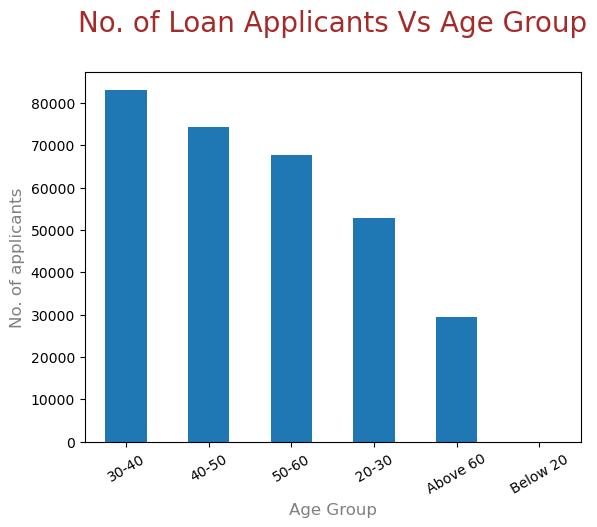

In [35]:
# Checking the values

ap_df['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title("No. of Loan Applicants Vs Age Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Age Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()


Note: We can make the AMT_INCOME_TOTAL data more readable by changing the unit to lakhs.

In [36]:
# Check the Total income summary - we can divide it by 100,000 for better readability

(ap_df['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.539393
std           0.625547
min           0.256500
25%           1.125000
50%           1.471500
75%           1.890000
max           3.375000
Name: AMT_INCOME_TOTAL, dtype: float64

In [37]:
# Define the bins and labels
bins = [0, 1, 2, 5, 10, 20, 50, 1000]
labels = ['Upto 1L', '1-2L', '2-5L', '5-10L', '10-20L', '20-50L', '50L above']

# Create the INCOME_GROUP column by binning AMT_INCOME_TOTAL
ap_df['INCOME_GROUP'] = pd.cut(ap_df['AMT_INCOME_TOTAL'] / 100000, bins=bins, labels=labels, right=False)


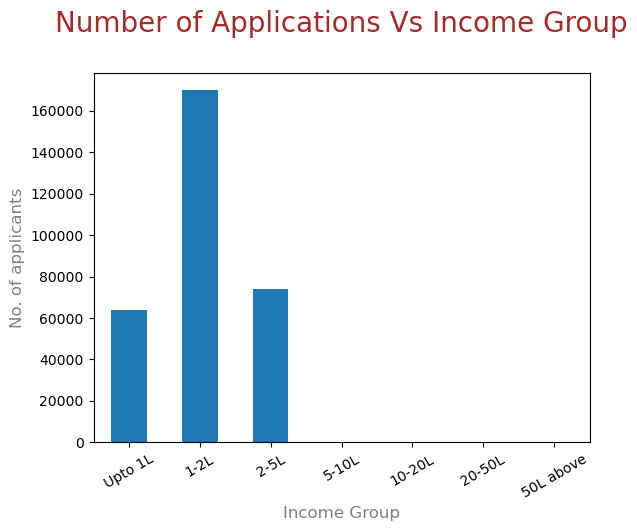

In [38]:
# Sort the value counts to ensure proper order of labels in the plot
income_group_counts = ap_df['INCOME_GROUP'].value_counts().reindex(labels)

# Plot the number of applications in each income group
income_group_counts.plot(kind='bar')

# Customize the plot
plt.title("Number of Applications Vs Income Group\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Grey'})
plt.xlabel('Income Group', fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Grey'})
plt.xticks(rotation=30)

# Show the plot
plt.show()

In [39]:
# Check the credit amount of the loan - we can divide it by 100,000 for better readability

(ap_df['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.687740
std           3.490408
min           0.450000
25%           2.700000
50%           5.135310
75%           7.819200
max          16.162785
Name: AMT_CREDIT, dtype: float64

In [40]:
# Binning AMT_ANNUITY based on above summary

bins = [0,1,5,10,20,30,40,50,100]
labels = ['Upto 1L','1-5L','5-10L','10-20L','20-30L','30-40L','40-50L','50L above']
ap_df['CREDIT_GROUP'] = pd.cut(ap_df['AMT_CREDIT'] / 100000, bins = bins, labels = labels )

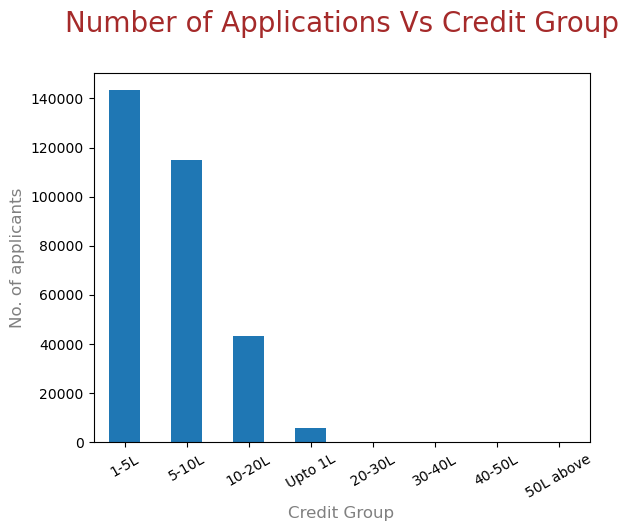

In [41]:
# Sort the value counts to ensure proper order of labels in the plot
credit_group_counts = ap_df['CREDIT_GROUP'].value_counts().reindex(labels)
# Checking the values
ap_df['CREDIT_GROUP'].value_counts().plot(kind='bar')
plt.title("Number of Applications Vs Credit Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Credit Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

Segregate data based on TARGET column

In [42]:
# Creating data frame of defaulters

ap_df1 = ap_df[ap_df['TARGET']==1]
ap_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    ...  FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0   ...                1                        0.0                       0.0   
26  ...                1                        0.0                       0.0   
40  ...                1                        0.0                       0.0   
42  ...                1                        0.0                       0.0   
81  ...                0                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       0.0   
26                        0.0                       0.0   
40                        0.0                       2.0   
42                        0.0                       0.0   
81                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_GROUP  \
0                        0.0                         1.0      20-30   
26                       2.0                         2.0      50-60   
40                       0.0                         4.0      40-50   
42                       0.0                         2.0      30-40   
81                       0.0                         0.0   Above 60   

    INCOME_GROUP  CREDIT_GROUP  
0           2-5L          1-5L  
26          1-2L         5-10L  
40          2-5L        10-20L  
42          1-2L          1-5L  
81       Upto 1L          1-5L  

[5 rows x 49 columns]

In [43]:
# Creating data frame of Others
ap_df0 = ap_df[ap_df['TARGET']==0]
ap_df0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...  FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
1  ...                1                        0.0                       0.0   
2  ...                0                        0.0                       0.0   
3  ...                1                        NaN                       NaN   
4  ...                0                        0.0                       0.0   
5  ...                1                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_GROUP  \
1                       0.0                         0.0      40-50   
2                       0.0                         0.0      50-60   
3                       NaN                         NaN      50-60   
4                       0.0                         0.0      50-60   
5                       1.0                         1.0      40-50   

   INCOME_GROUP  CREDIT_GROUP  
1          2-5L        10-20L  
2       Upto 1L          1-5L  
3          1-2L          1-5L  
4          1-2L         5-10L  
5       Upto 1L          1-5L  

[5 rows x 49 columns]

# Univariate Analysis

Categorical Variable Analysis:

We will plot graphs of the below categorical variables to draw inferences-

NAME_CONTRACT_TYPE, 
CODE_GENDER,
OCCUPATION_TYPE, 
NAME_INCOME_TYPE, 
NAME_EDUCATION_TYPE, 
NAME_FAMILY_STATUS, 
NAME_HOUSING_TYPE, 
INCOME_GROUP, 
AGE_GROUP 

In [44]:
# Defining a function to plot univariate categorical variables

def univariate_categorical_plot(category1, category2, xlabel):
    plt.figure(figsize=[15, 7])
    
    # Plot for Defaulters
    plt.subplot(1, 2, 1)
    sns.countplot(x=category1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')
    
    # Plot for Others
    plt.subplot(1, 2, 2)
    sns.countplot(x=category2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')

    plt.show()

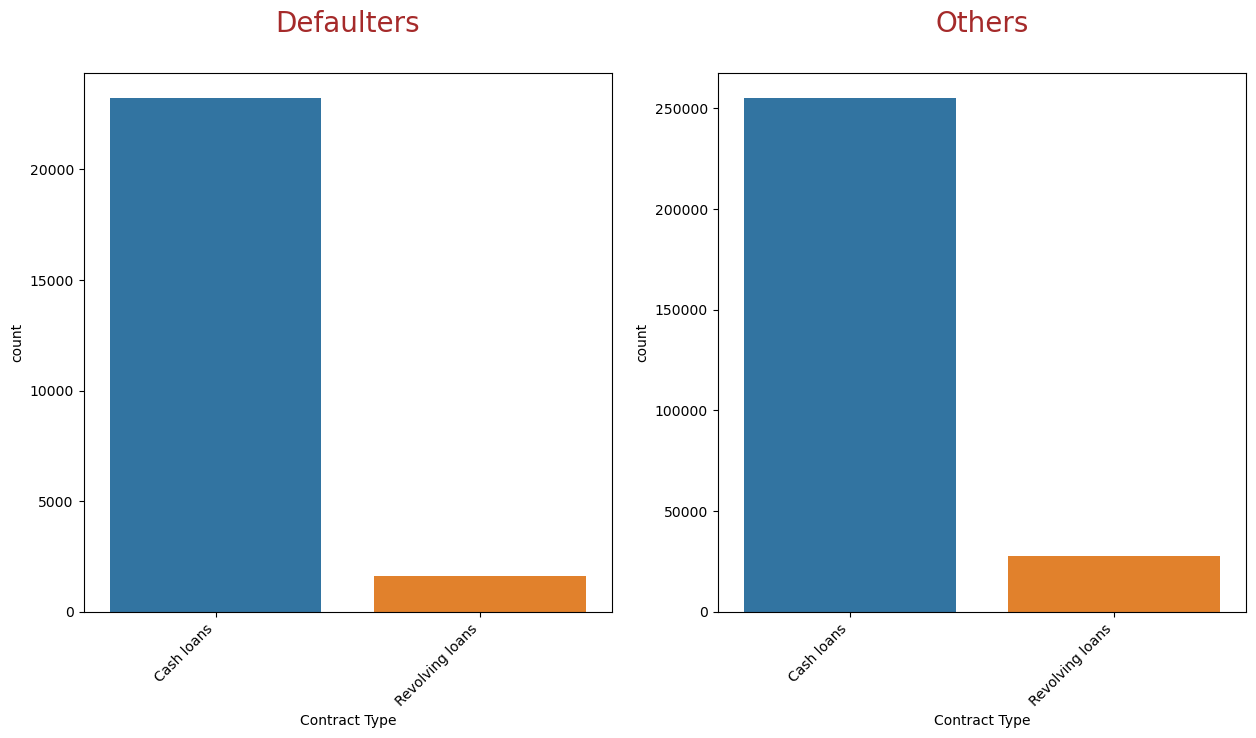

In [45]:
category1 = ap_df1['NAME_CONTRACT_TYPE'].astype(str)
category2 = ap_df0['NAME_CONTRACT_TYPE'].astype(str)
xlabel = 'Contract Type'

univariate_categorical_plot(category1, category2, xlabel)

Cash loan are high in numbers in both cases.

In [46]:
# Defining a function to plot defaulter percentage against univariate categorical variable

def perc_defaulter(col1, col2, title, xlabel):
    
    tempdf = ap_df[[col1,col2]].groupby([col2], as_index=False).mean()

    tempdf[col1] = tempdf[col1]*100
    tempdf.sort_values(by=col1, ascending=False, inplace=True)

    sns.barplot(x=col2, y = col1, data = tempdf)
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.ylabel('Defaulter %')
    plt.xticks(rotation=45, ha='right')
    plt.show()

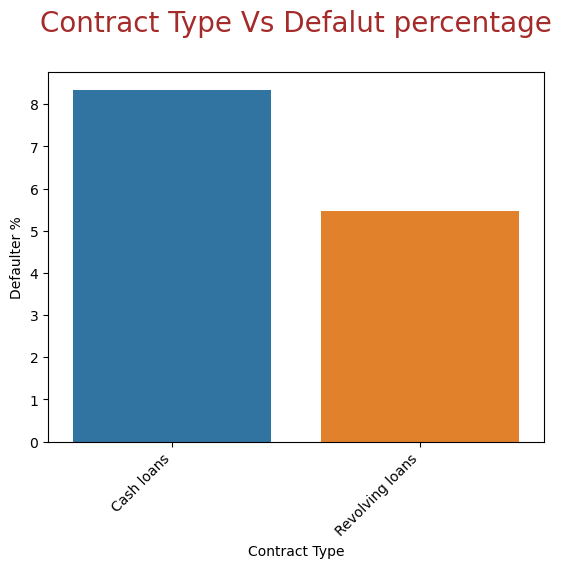

In [47]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_CONTRACT_TYPE'
title = 'Contract Type Vs Defalut percentage\n'
xlabel = 'Contract Type'

perc_defaulter(col1, col2, title, xlabel)

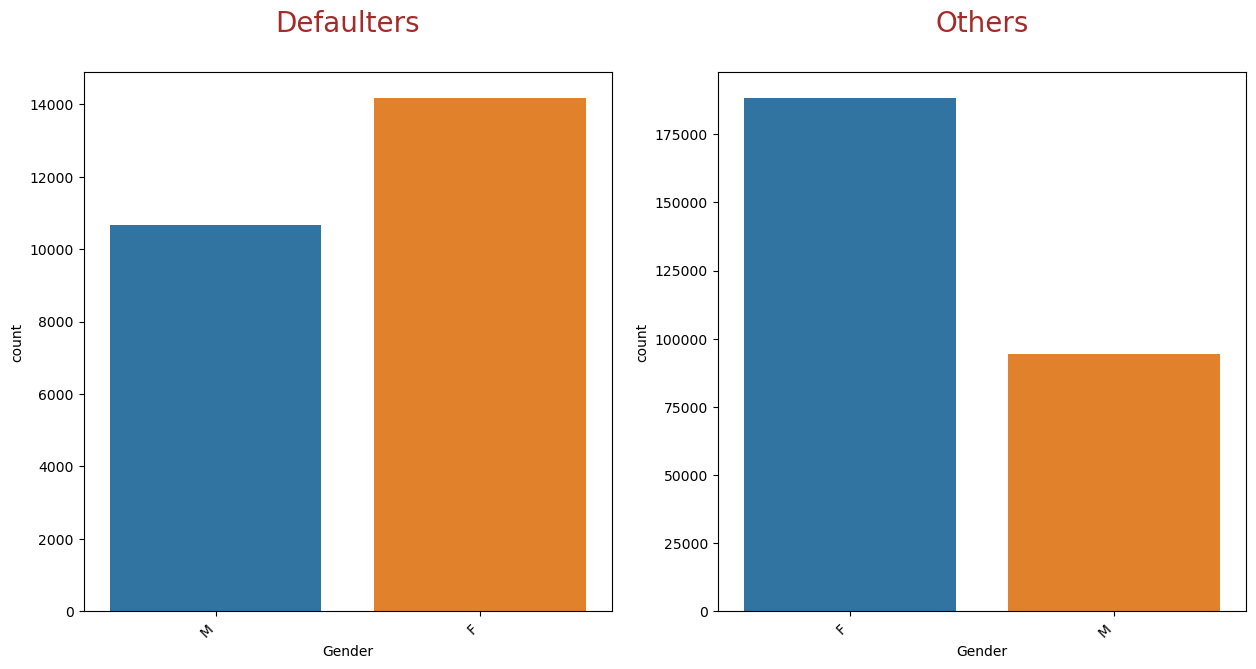

In [48]:
# Analysing w.r.t Gender column

category1 = ap_df1['CODE_GENDER']
category2 = ap_df0['CODE_GENDER']
xlabel = 'Gender'

univariate_categorical_plot(category1, category2, xlabel)

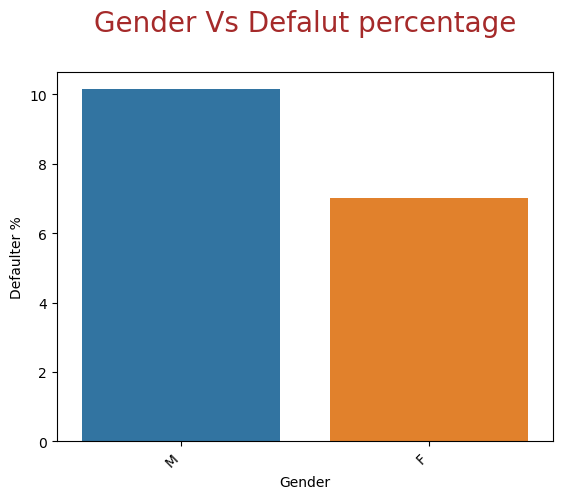

In [49]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'CODE_GENDER'
title = 'Gender Vs Defalut percentage\n'
xlabel = 'Gender'

perc_defaulter(col1, col2, title, xlabel)

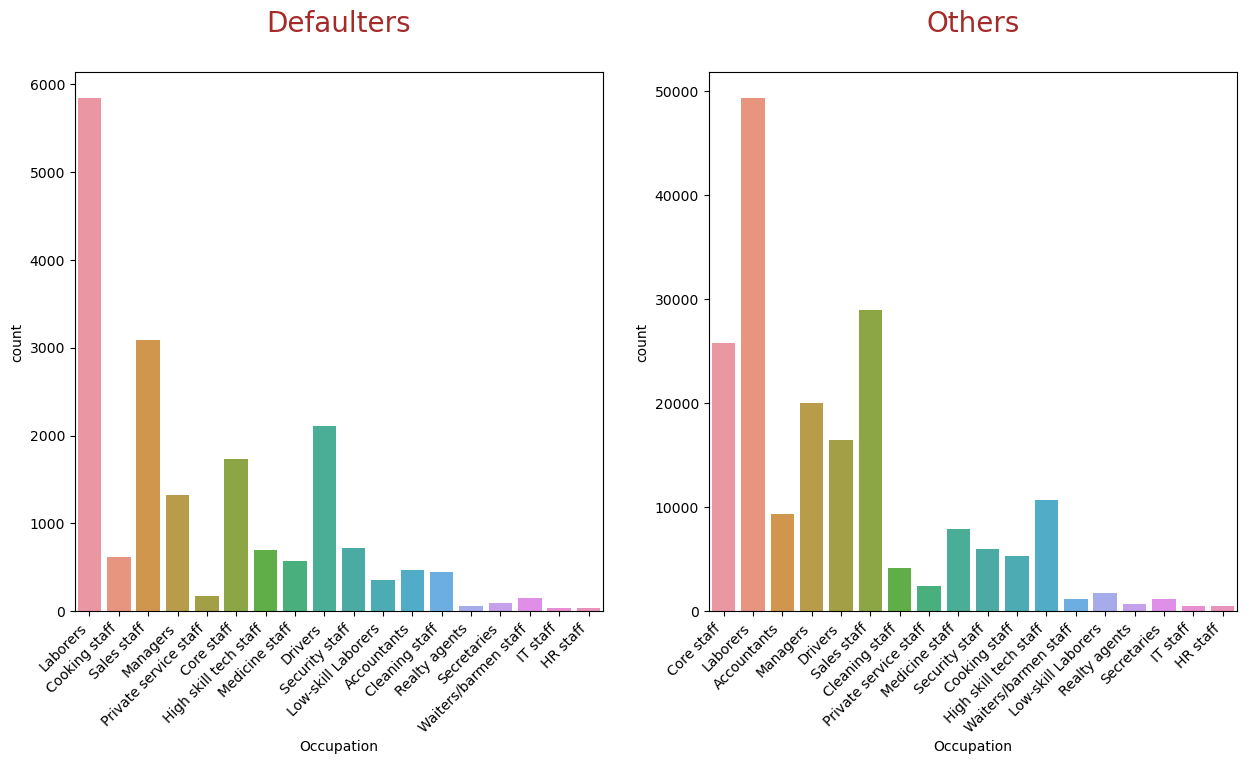

In [50]:
# Analyzing w.r.t Occupation column

category1 = ap_df1['OCCUPATION_TYPE']
category2 = ap_df0['OCCUPATION_TYPE']
xlabel = 'Occupation'

univariate_categorical_plot(category1, category2, xlabel)

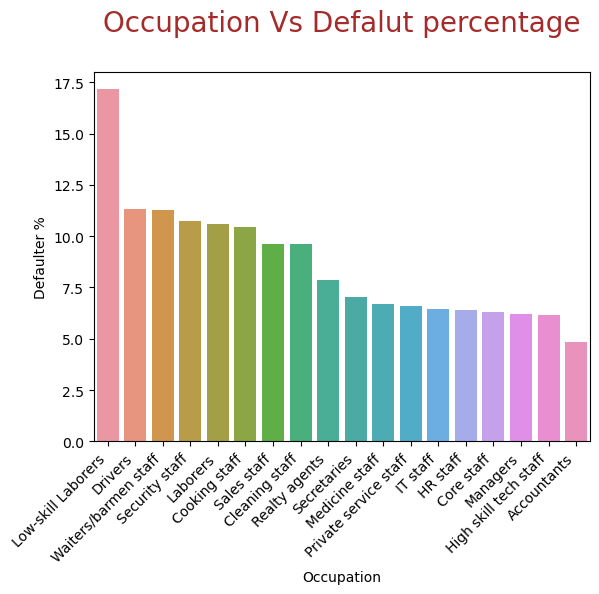

In [51]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'OCCUPATION_TYPE'
title = 'Occupation Vs Defalut percentage\n'
xlabel = 'Occupation'

perc_defaulter(col1, col2, title, xlabel)

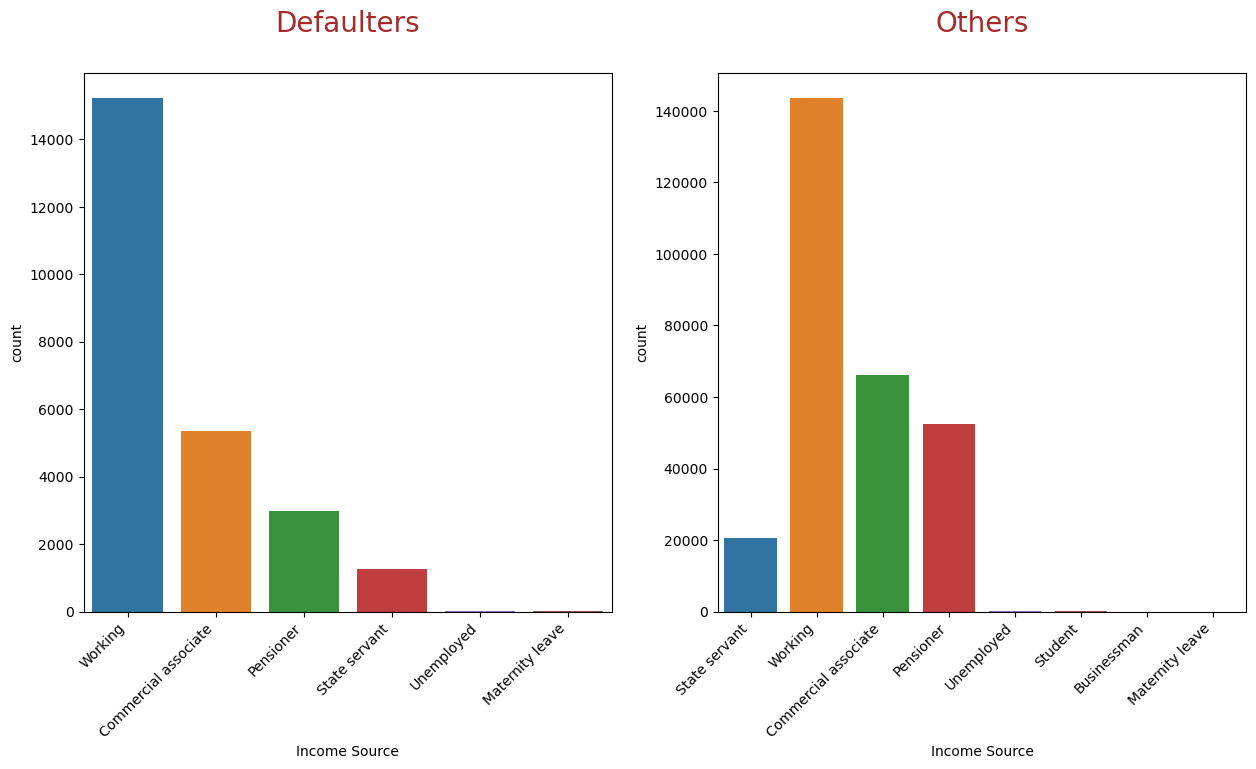

In [52]:
# Analysing w.r.t Income Type column

category1 = ap_df1['NAME_INCOME_TYPE']
category2 = ap_df0['NAME_INCOME_TYPE']
xlabel = 'Income Source'

univariate_categorical_plot(category1, category2, xlabel)

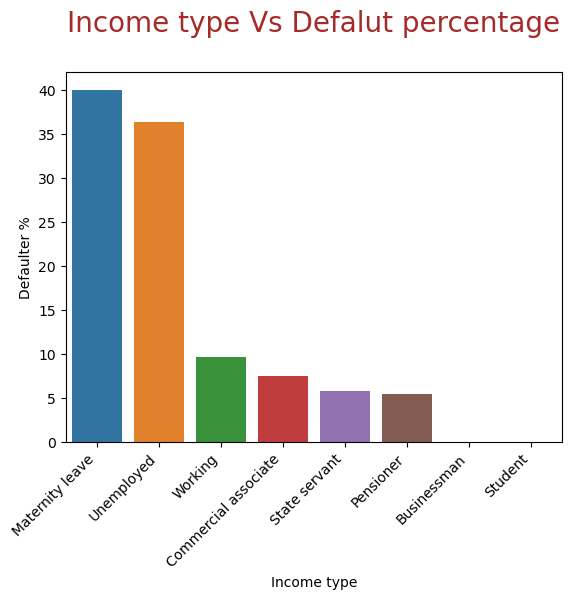

In [53]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_INCOME_TYPE'
title = 'Income type Vs Defalut percentage\n'
xlabel = 'Income type'

perc_defaulter(col1, col2, title, xlabel)

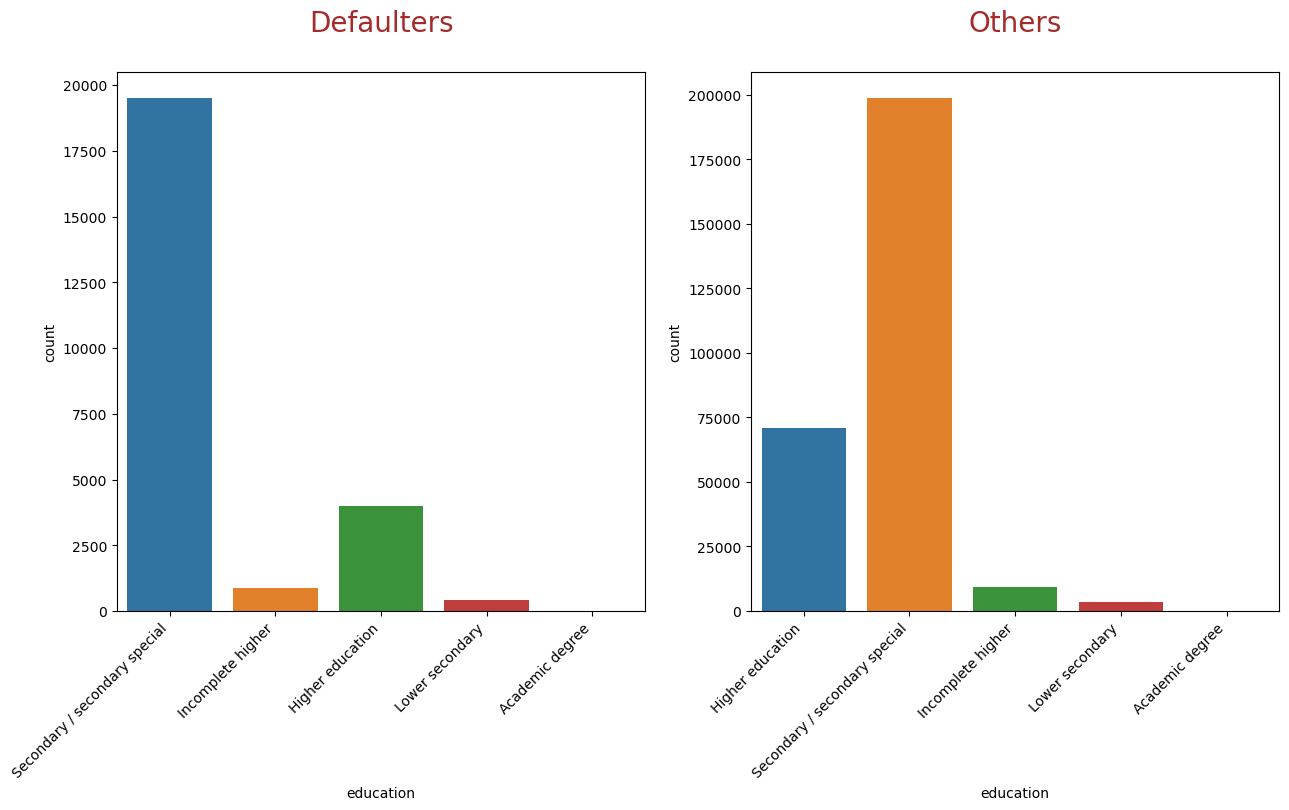

In [54]:
#Analysing wrt Education type column

category1= ap_df1['NAME_EDUCATION_TYPE']
category2= ap_df0['NAME_EDUCATION_TYPE']
xlabel = 'education'

univariate_categorical_plot(category1, category2, xlabel)

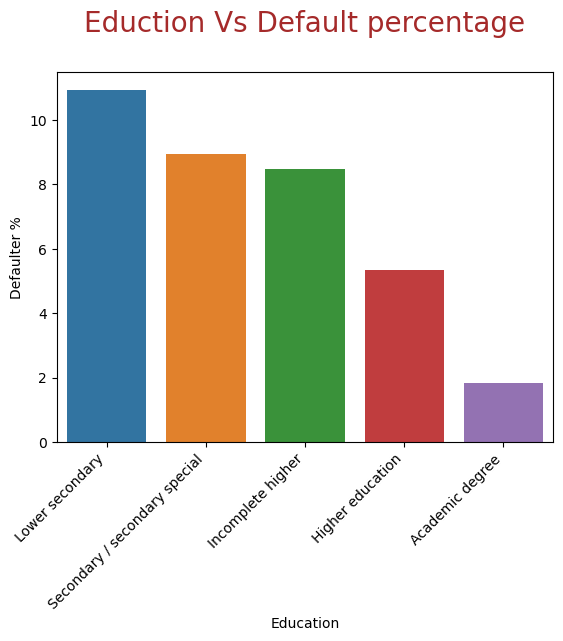

In [55]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_EDUCATION_TYPE'
title = 'Eduction Vs Default percentage\n'
xlabel = 'Education'

perc_defaulter(col1, col2, title, xlabel)


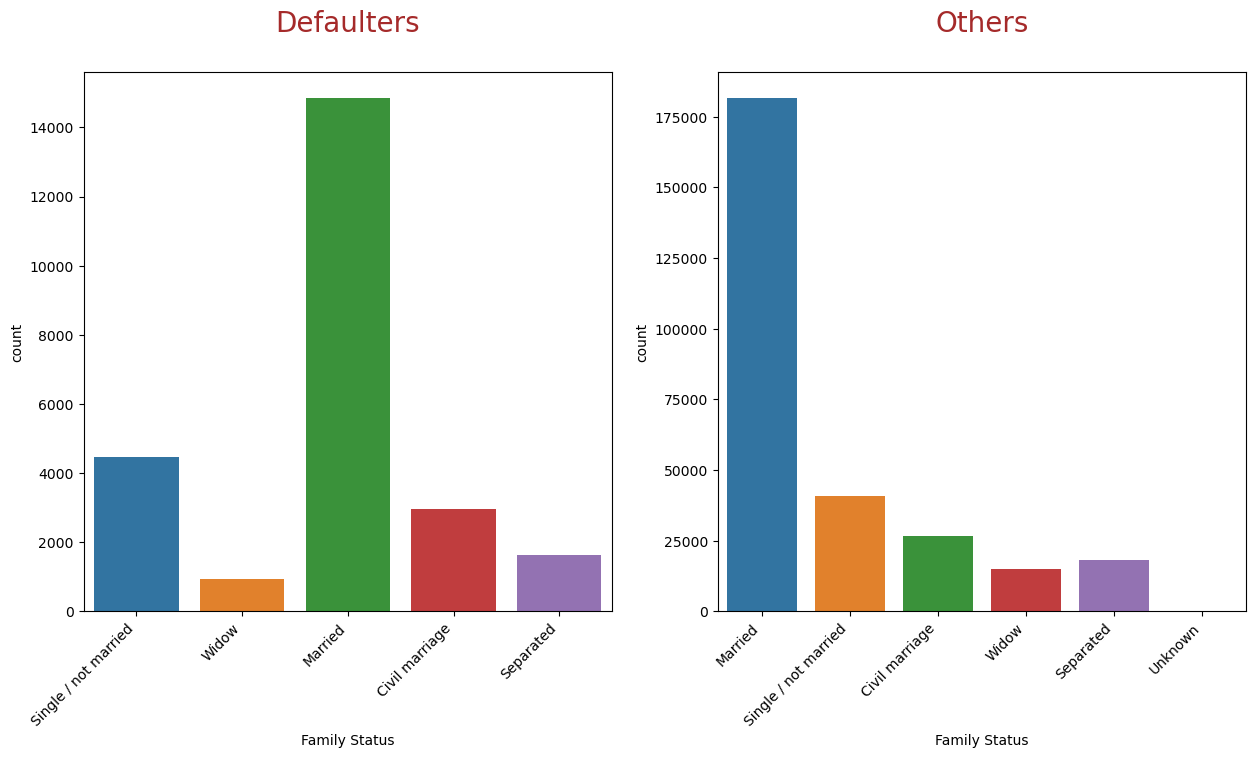

In [56]:
# Analysing w.r.t Family Status Type column

category1 = ap_df1['NAME_FAMILY_STATUS']
category2 = ap_df0['NAME_FAMILY_STATUS']
xlabel = 'Family Status'

univariate_categorical_plot(category1, category2, xlabel)

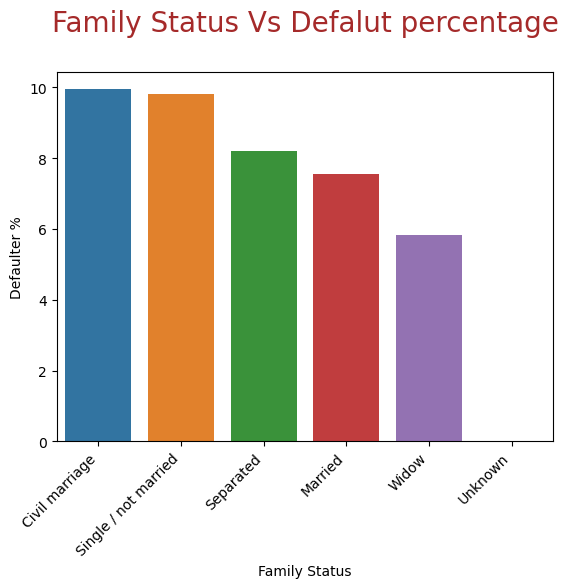

In [57]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_FAMILY_STATUS'
title = 'Family Status Vs Defalut percentage\n'
xlabel = 'Family Status'

perc_defaulter(col1, col2, title, xlabel)

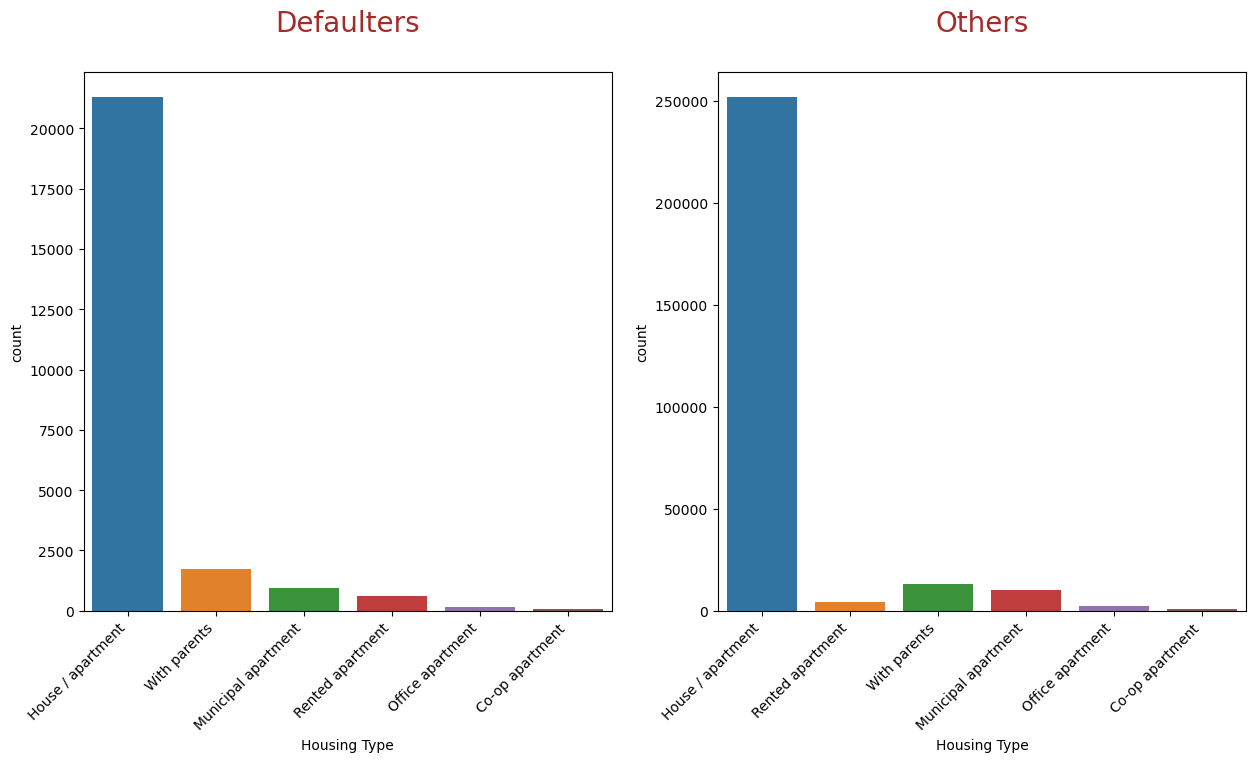

In [58]:
# Analysing w.r.t Housing Type Type column


category1 = ap_df1['NAME_HOUSING_TYPE']
category2 = ap_df0['NAME_HOUSING_TYPE']
xlabel = 'Housing Type'

univariate_categorical_plot(category1, category2, xlabel)

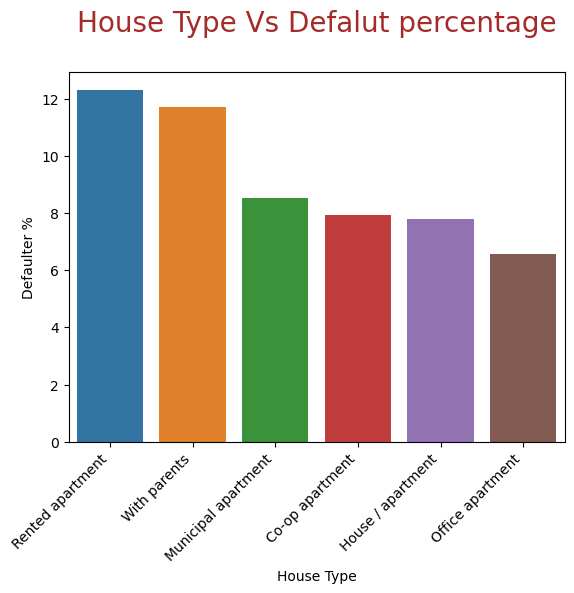

In [59]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_HOUSING_TYPE'
title = 'House Type Vs Defalut percentage\n'
xlabel = 'House Type'

perc_defaulter(col1, col2, title, xlabel)

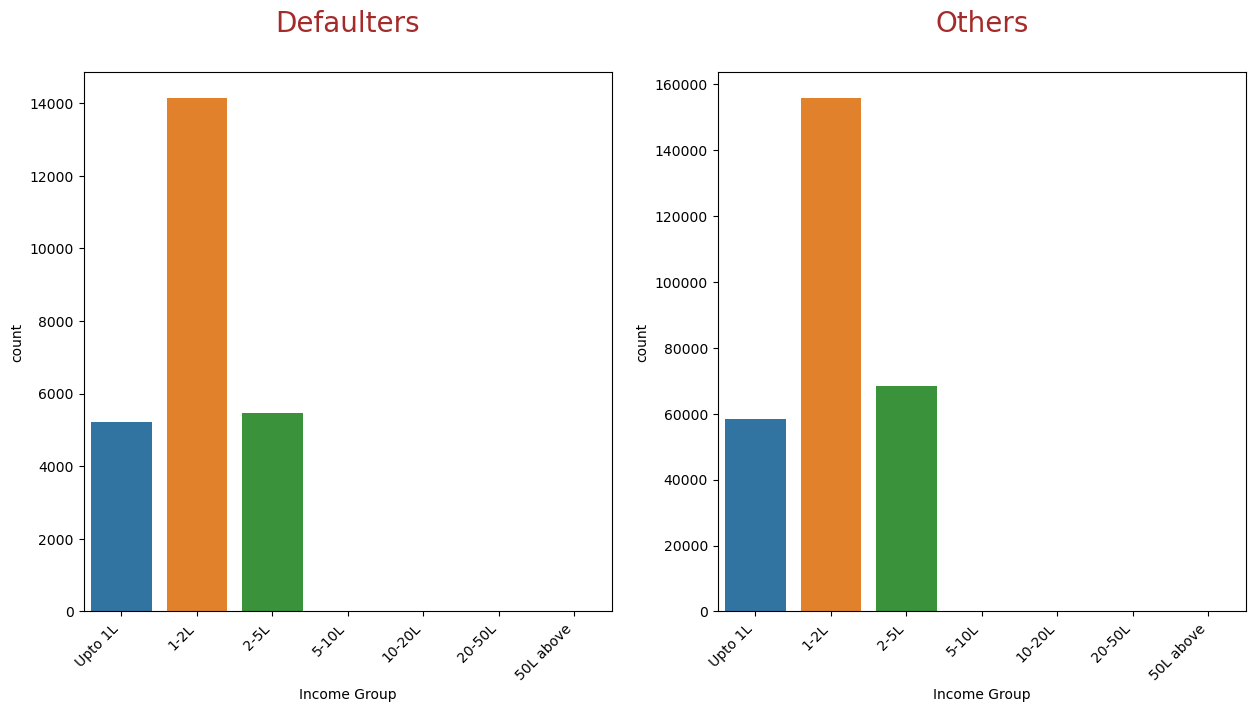

In [60]:
# Analyzing w.r.t Income Group column

category1 = ap_df1['INCOME_GROUP']
category2 = ap_df0['INCOME_GROUP']
xlabel = 'Income Group'

univariate_categorical_plot(category1, category2, xlabel)

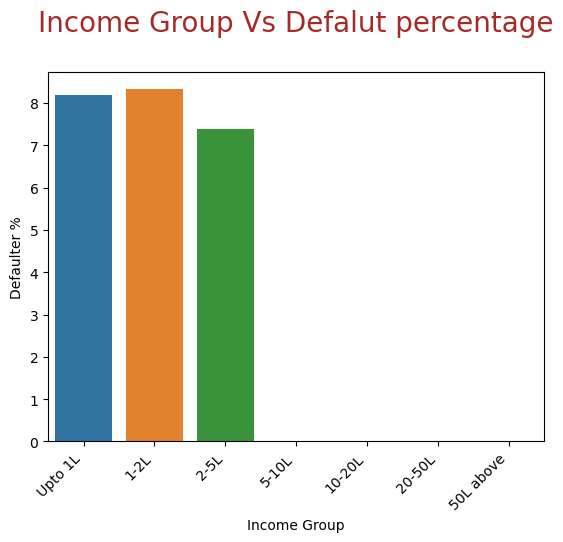

In [61]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'INCOME_GROUP'
title = 'Income Group Vs Defalut percentage\n'
xlabel = 'Income Group'

perc_defaulter(col1, col2, title, xlabel)

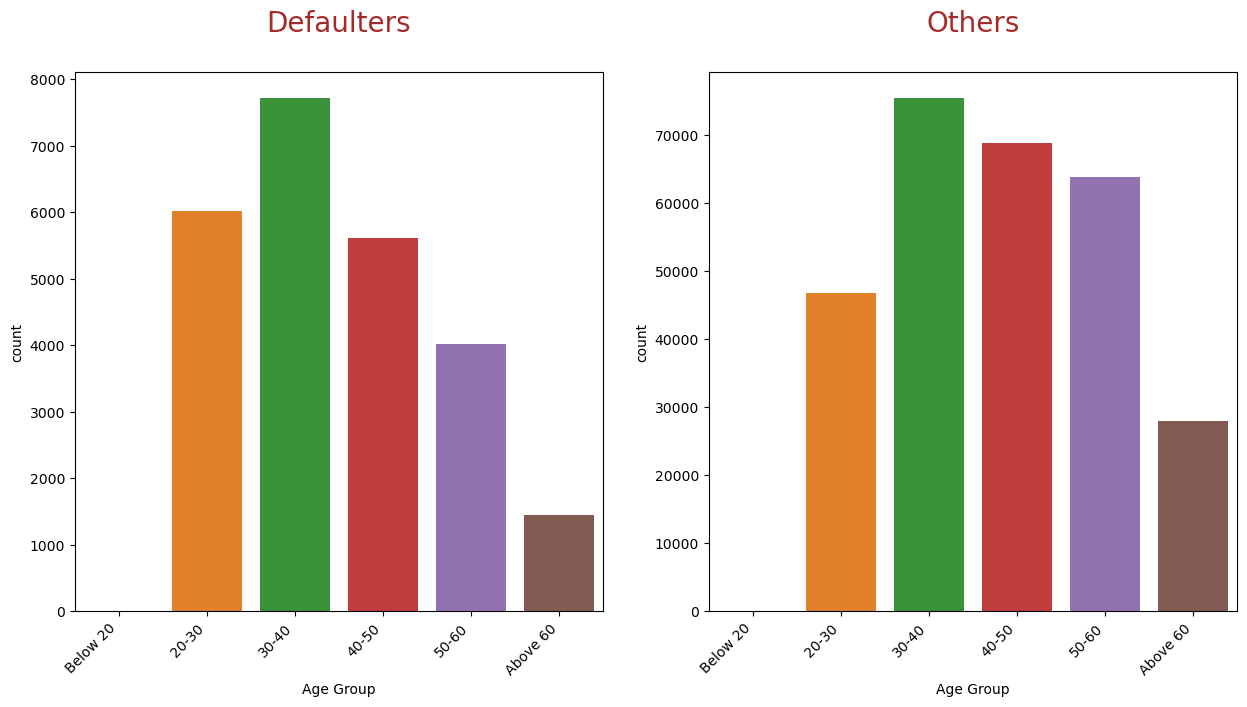

In [62]:
# Analysing w.r.t Age Group column

category1 = ap_df1['AGE_GROUP']
category2 = ap_df0['AGE_GROUP']
xlabel = 'Age Group'

univariate_categorical_plot(category1, category2, xlabel)

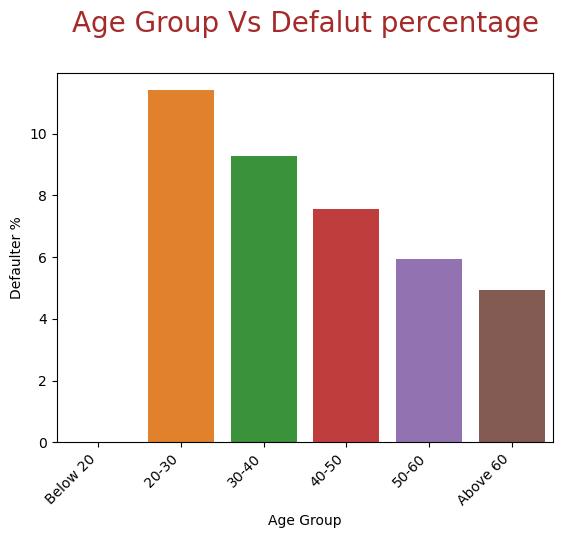

In [63]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'AGE_GROUP'
title = 'Age Group Vs Defalut percentage\n'
xlabel = 'Age Group'

perc_defaulter(col1, col2, title, xlabel)

Numeric variable Analysis:


Here we are going to consider the below numeric columns and draw are conclusion on them.

AMT_INCOME_TOTAL,
AMT_CREDIT,
AMT_ANNUITY,
AMT_GOODS_PRICE,
CNT_CHILDREN,
DAYS_BIRTH

In [64]:
# Defining a function to plot univariate numerical columns
def univariate_numerical_plots(col1, col2, title, xlabel):
    sns.distplot(col1.dropna(), hist=False, label='Defaulters')
    sns.distplot(col2.dropna(), hist=False, label='Others')
    plt.title(title, fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

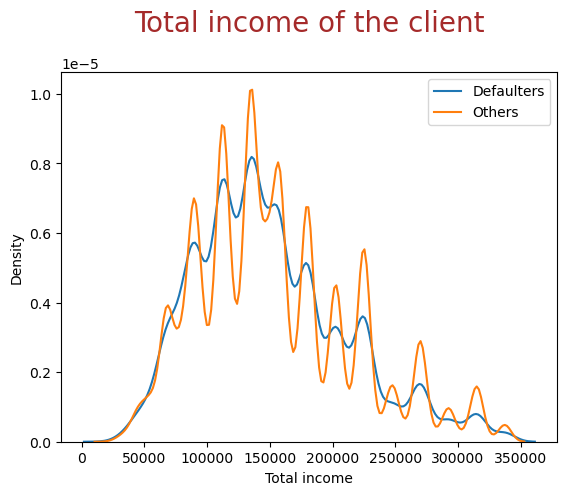

In [65]:
# Example usage of univariate_numerical_plots function
numerical_column = 'AMT_INCOME_TOTAL'
col1 = ap_df1[numerical_column]
col2 = ap_df0[numerical_column]
title = 'Total income of the client\n'
xlabel = 'Total income'

univariate_numerical_plots(col1, col2, title, xlabel)

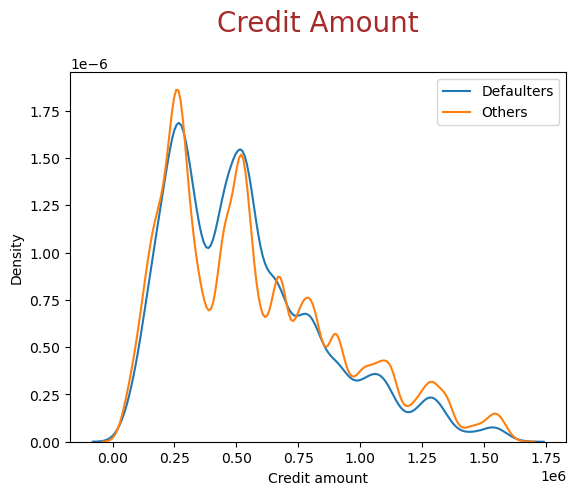

In [66]:
col1 = ap_df1['AMT_CREDIT']
col2 = ap_df0['AMT_CREDIT']
title = "Credit Amount\n"
xlabel = "Credit amount"

univariate_numerical_plots(col1, col2, title, xlabel)

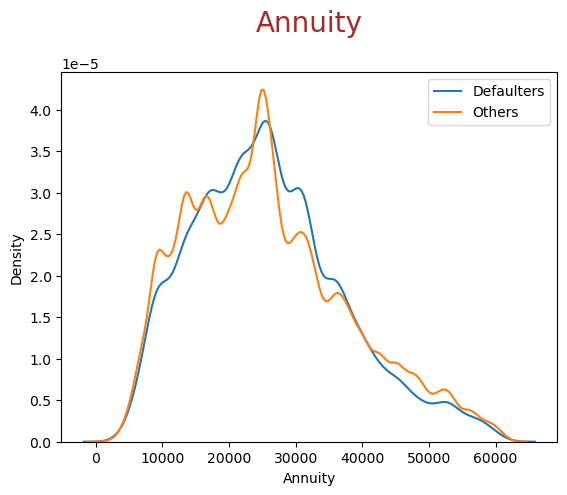

In [67]:
col1 = ap_df1['AMT_ANNUITY']
col2 = ap_df0['AMT_ANNUITY']
title = 'Annuity\n'
xlabel ='Annuity'

univariate_numerical_plots(col1, col2, title, xlabel)


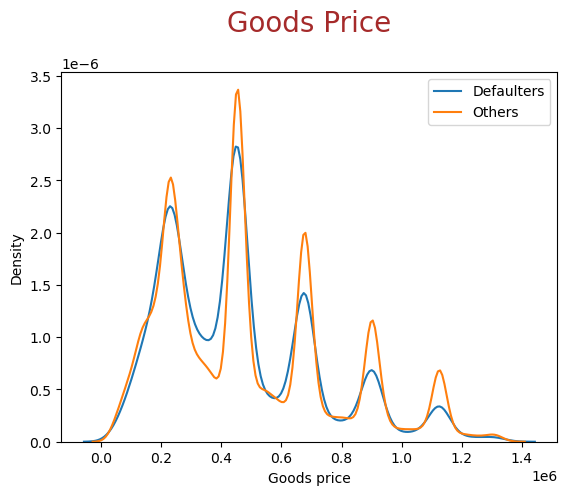

In [68]:
col1 = ap_df1['AMT_GOODS_PRICE']
col2 = ap_df0['AMT_GOODS_PRICE']
title = 'Goods Price\n'
xlabel = 'Goods price'

univariate_numerical_plots(col1, col2, title, xlabel)

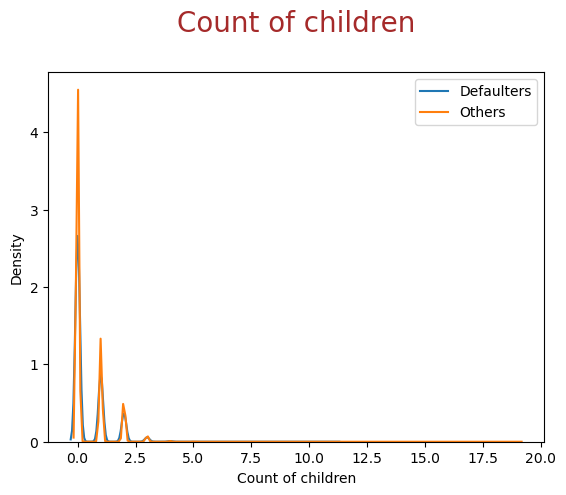

In [69]:
col1 = ap_df1['CNT_CHILDREN']
col2 = ap_df0['CNT_CHILDREN']
title = 'Count of children\n'
xlabel = 'Count of children'

univariate_numerical_plots(col1, col2, title, xlabel)

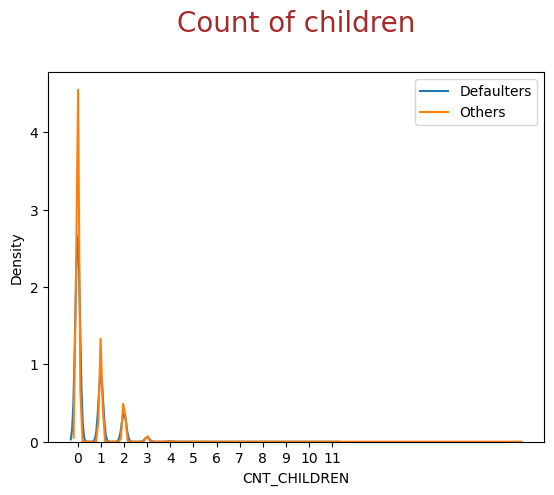

In [70]:
sns.distplot(ap_df1['CNT_CHILDREN'],hist=False, label='Defaulters')
sns.distplot(ap_df0['CNT_CHILDREN'],hist=False, label='Others')
xlabel = 'Children'
ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
plt.xticks(ticks)
plt.legend()
plt.title('Count of children\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()


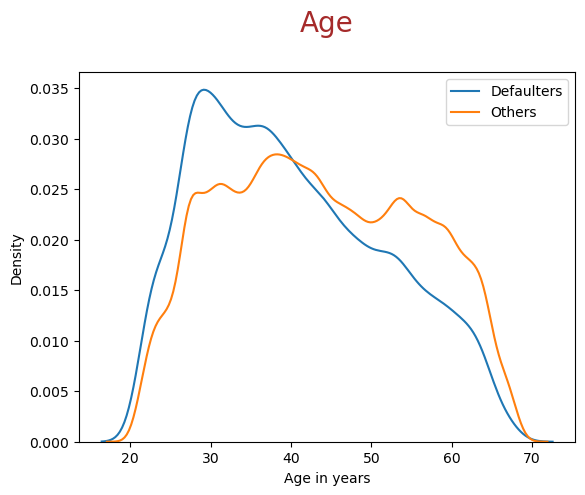

In [71]:
col1 = ap_df1['DAYS_BIRTH']//365
col2 = ap_df0['DAYS_BIRTH']//365
title = 'Age\n'
xlabel = 'Age in years'

univariate_numerical_plots(col1, col2, title, xlabel)


In [72]:
corr_df1 = ap_df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df1

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.306271     0.378921         0.296096   
AMT_CREDIT                0.306271    1.000000     0.723462         0.915150   
AMT_ANNUITY               0.378921    0.723462     1.000000         0.700295   
AMT_GOODS_PRICE           0.296096    0.915150     0.700295         1.000000   
DAYS_BIRTH               -0.012044    0.136430     0.011713         0.129190   
DAYS_EMPLOYED             0.019165    0.103077     0.039944         0.107125   
CNT_CHILDREN             -0.005195    0.001173     0.036081        -0.003347   

                  DAYS_BIRTH  DAYS_EMPLOYED  CNT_CHILDREN  
AMT_INCOME_TOTAL   -0.012044       0.019165     -0.005195  
AMT_CREDIT          0.136430       0.103077      0.001173  
AMT_ANNUITY         0.011713       0.039944      0.036081  
AMT_GOODS_PRICE     0.129190       0.107125     -0.003347  
DAYS_BIRTH          1.000000       0.283521     -0.259109  
DAYS_EMPLOYED       0.283521       1.000000     -0.044575  
CNT_CHILDREN       -0.259109      -0.044575      1.000000

In [73]:
corr_df0 = ap_df0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df0

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.328605     0.398119         0.309677   
AMT_CREDIT                0.328605    1.000000     0.724593         0.875417   
AMT_ANNUITY               0.398119    0.724593     1.000000         0.684409   
AMT_GOODS_PRICE           0.309677    0.875417     0.684409         1.000000   
DAYS_BIRTH               -0.090269    0.048522    -0.016660         0.042102   
DAYS_EMPLOYED             0.033536    0.080431     0.050050         0.076810   
CNT_CHILDREN              0.024488    0.002787     0.023932         0.002428   

                  DAYS_BIRTH  DAYS_EMPLOYED  CNT_CHILDREN  
AMT_INCOME_TOTAL   -0.090269       0.033536      0.024488  
AMT_CREDIT          0.048522       0.080431      0.002787  
AMT_ANNUITY        -0.016660       0.050050      0.023932  
AMT_GOODS_PRICE     0.042102       0.076810      0.002428  
DAYS_BIRTH          1.000000       0.229944     -0.336966  
DAYS_EMPLOYED       0.229944       1.000000     -0.042480  
CNT_CHILDREN       -0.336966      -0.042480      1.000000

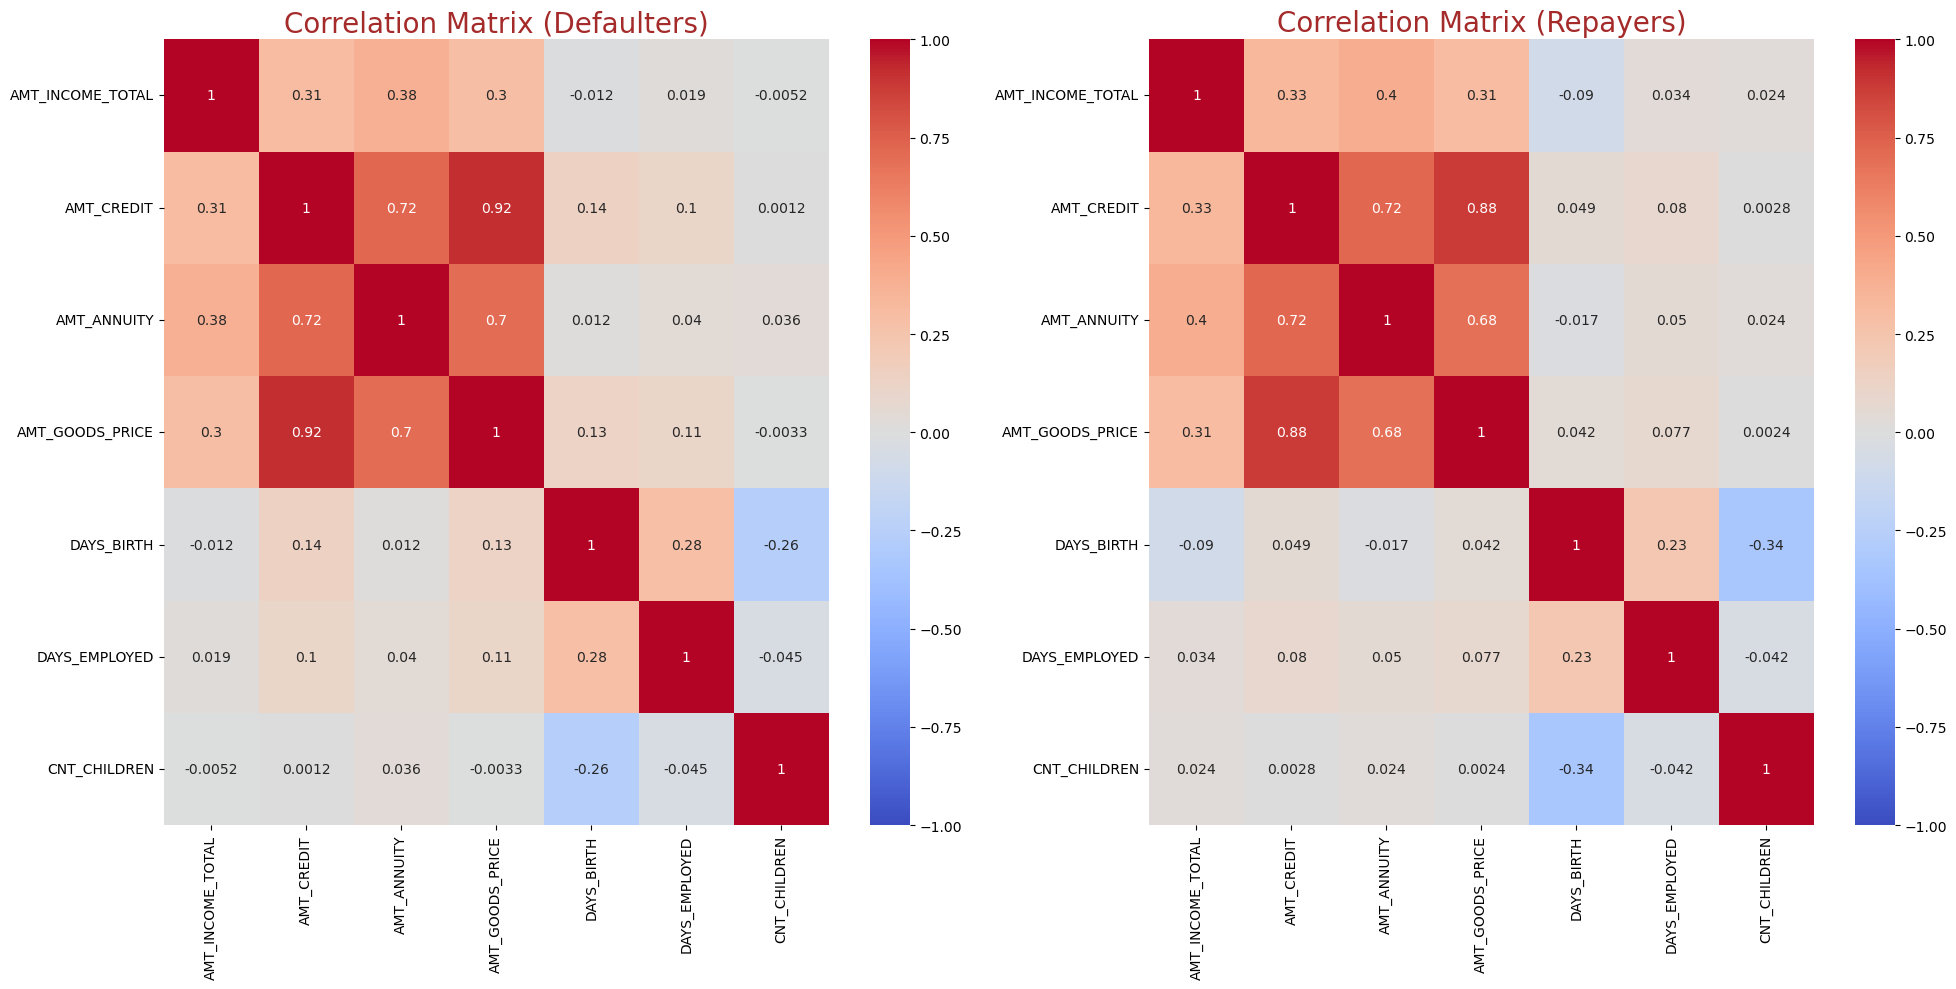

In [74]:
# Plotting heatmaps
plt.figure(figsize=(20, 10))

# Heatmap for Defaulters
plt.subplot(1, 2, 1)
sns.heatmap(corr_df1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Defaulters)', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})

# Heatmap for Repayers
plt.subplot(1, 2, 2)
sns.heatmap(corr_df0, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Repayers)', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})

plt.tight_layout()
plt.show()

# Bivariate Analysis

Categorical - Categorical Analysis

Columns considered -

NAME_CONTRACT_TYPE - CODE_GENDER,
NAME_INCOME_TYPE - NAME_CONTRACT_TYPE,
INCOME_GROUP - CODE_GENDER,
CODE_GENDER - FLAG_OWN_REALTY,
NAME_HOUSING_TYPE - FLAG_OWN_REALTY,
NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

In [75]:
def cat_cat_plot(var1, var2, label, legend):
    plt.figure(figsize=[20, 5])
    
    # Plot for Defaulters
    plt.subplot(1, 2, 1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    sns.countplot(x=var1, hue=var2, data=ap_df1)
    plt.xlabel(label)
    plt.xticks(rotation=45)
    plt.legend(title=legend, loc='upper right')

    # Plot for Others (Repayers)
    plt.subplot(1, 2, 2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Brown'})
    sns.countplot(x=var1, hue=var2, data=ap_df0)
    plt.xlabel(label)
    plt.xticks(rotation=45)
    plt.legend(title=legend, loc='upper right')
    
    plt.show()

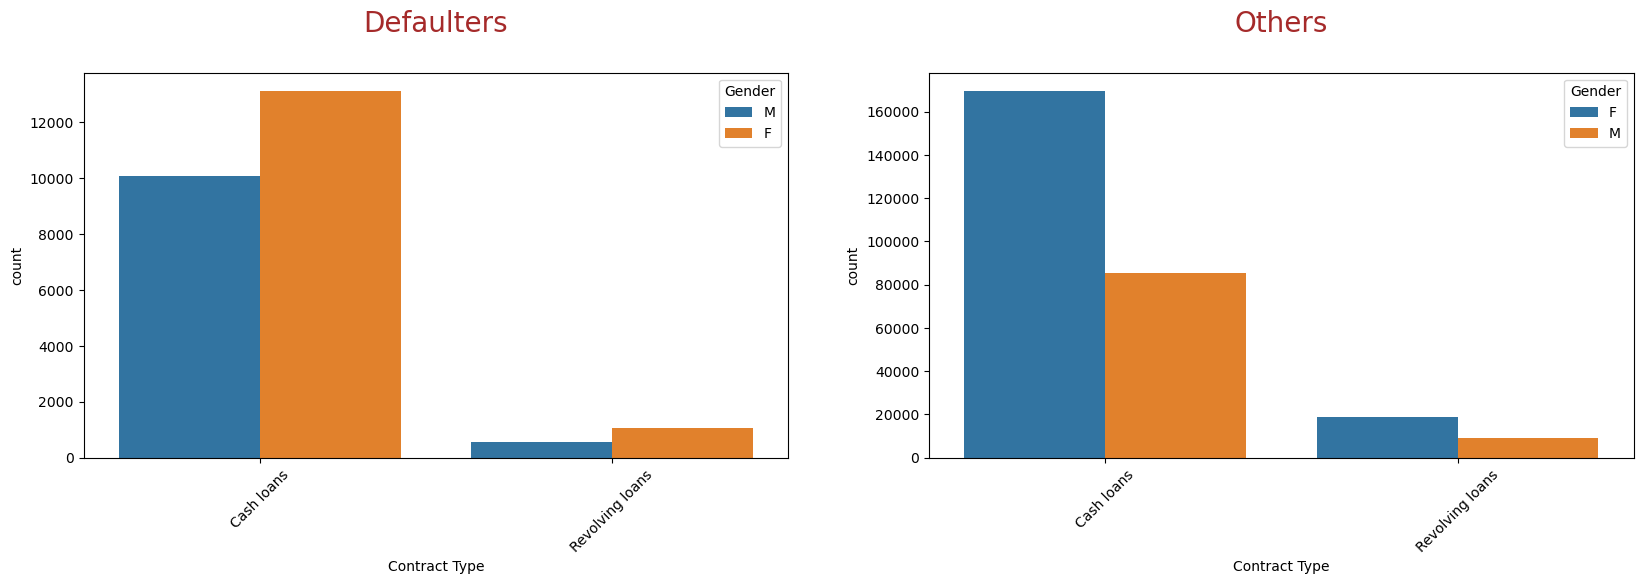

In [76]:
# Example usage of cat_cat_plot function
var1 = 'NAME_CONTRACT_TYPE'
var2 = 'CODE_GENDER'
label = 'Contract Type'
legend = 'Gender'

cat_cat_plot(var1, var2, label, legend)

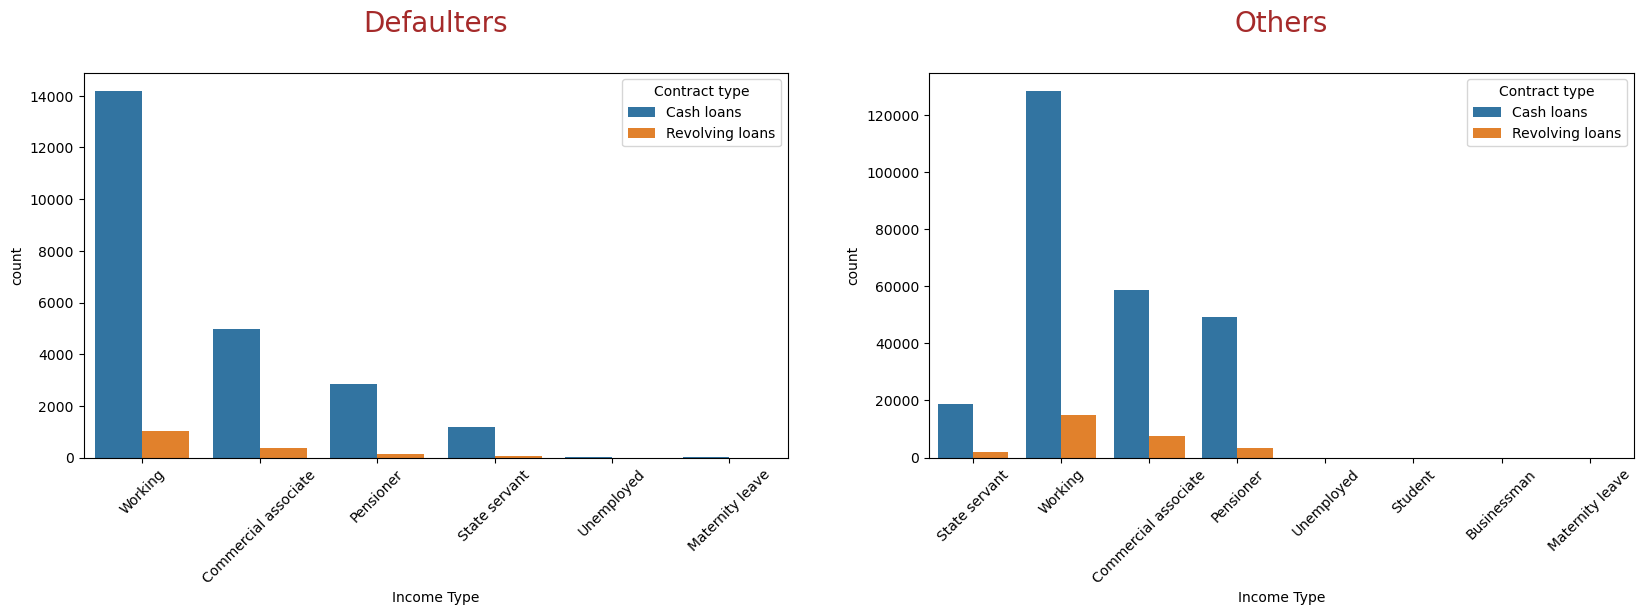

In [77]:
# NAME_INCOME_TYPE - NAME_CONTRACT_TYPE

var1 = 'NAME_INCOME_TYPE'
var2 = 'NAME_CONTRACT_TYPE'
label = 'Income Type'
legend = 'Contract type'

cat_cat_plot(var1, var2, label, legend)

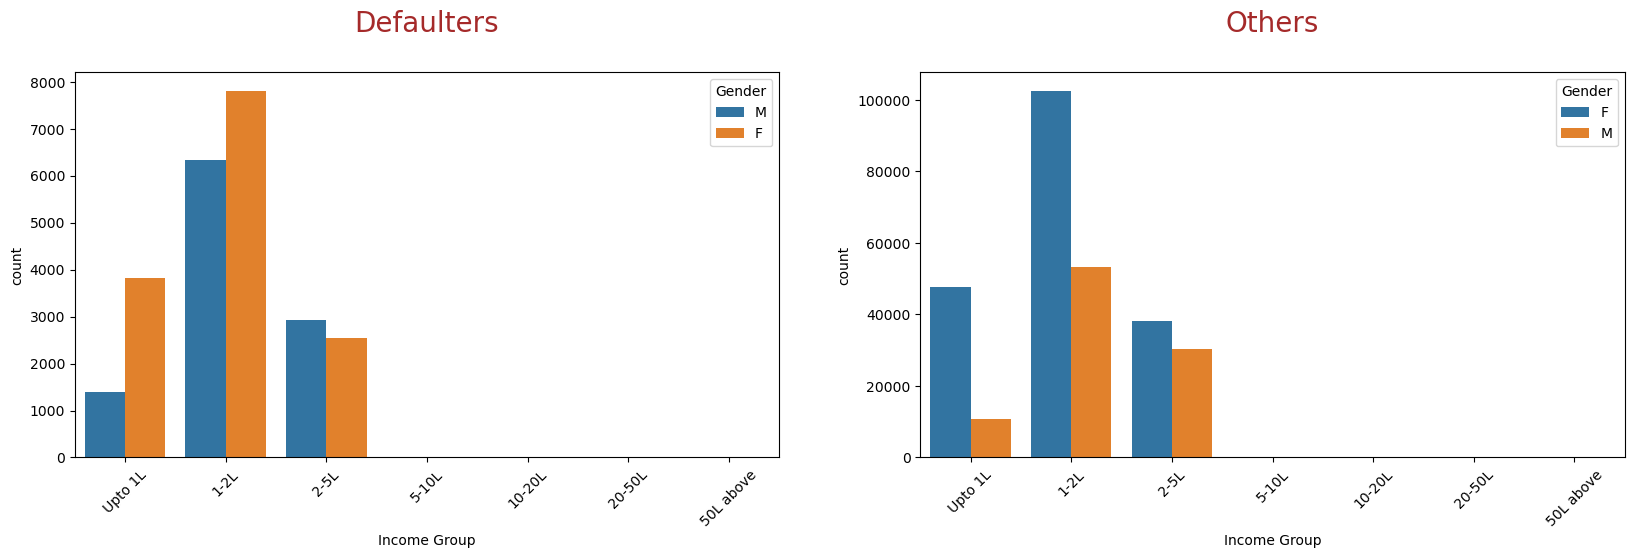

In [78]:
# INCOME_GROUP - CODE_GENDER

var1 = 'INCOME_GROUP'
var2 = 'CODE_GENDER'
label = 'Income Group'
legend = 'Gender'

cat_cat_plot(var1, var2, label, legend)


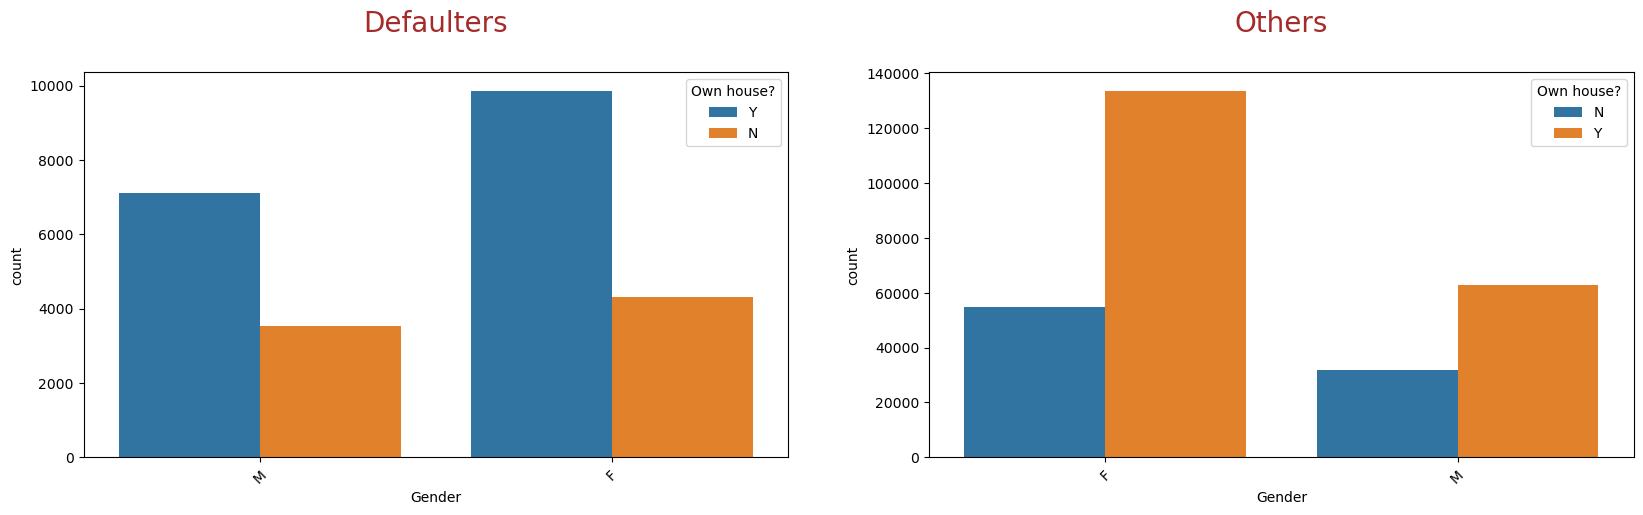

In [79]:
# CODE_GENDER - FLAG_OWN_REALTY

var1 = 'CODE_GENDER'
var2 = 'FLAG_OWN_REALTY'
label = 'Gender'
legend = 'Own house?'

cat_cat_plot(var1, var2, label, legend)

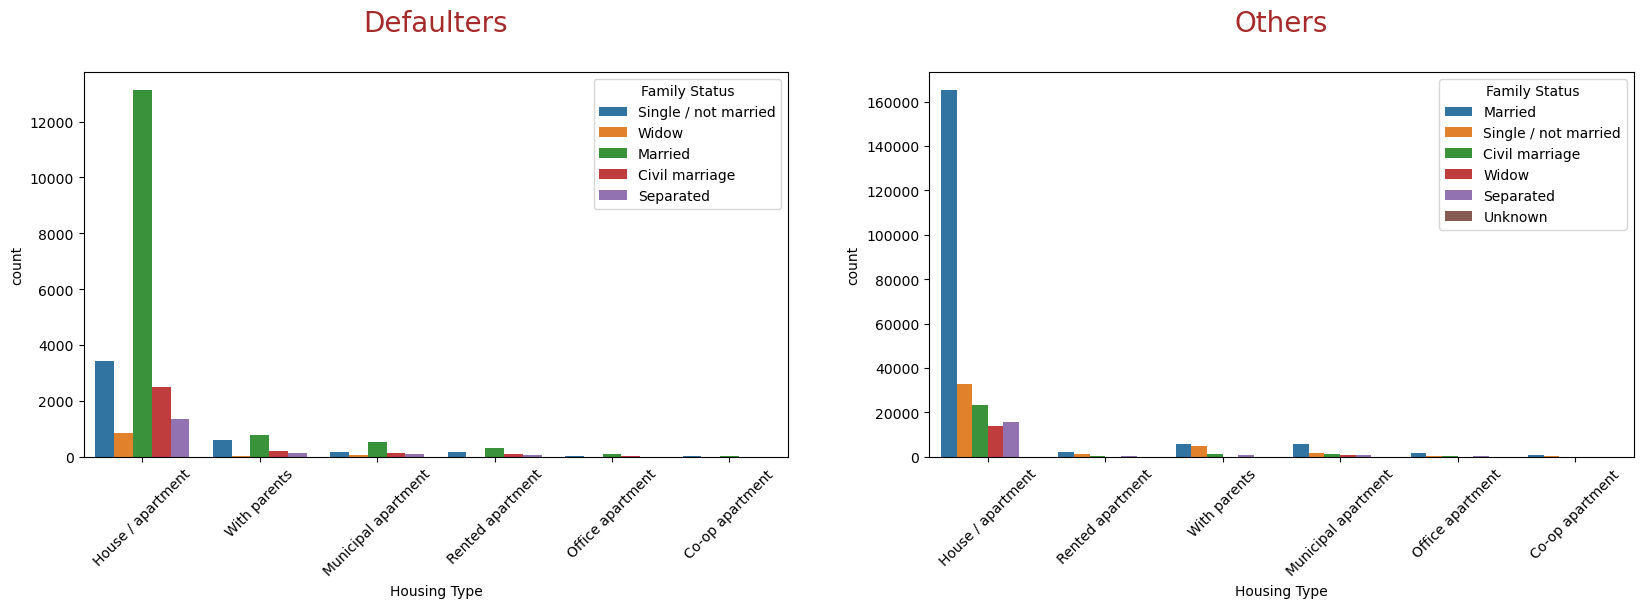

In [80]:
# NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

var1 = 'NAME_HOUSING_TYPE'
var2 = 'NAME_FAMILY_STATUS'
label = 'Housing Type'
legend = 'Family Status'

cat_cat_plot(var1, var2, label, legend)

Categorical - Continuous Analysis
Columns considered -

NAME_CONTRACT_TYPE - AMT_CREDIT,
NAME_INCOME_TYPE - AMT_CREDIT,
NAME_EDUCATION_TYPE - AMT_ANNUITY,
NAME_HOUSING_TYPE - AMT_CREDIT,
OCCUPATION_TYPE - AMT_CREDIT

In [81]:
# Defining function for categorical - Continuous variable plotting

def cat_cont_plot(var1, var2, xlabel, ylabel):
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(x=var1,y=var2, data=ap_df1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(x=var1,y=var2, data=ap_df0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.show()

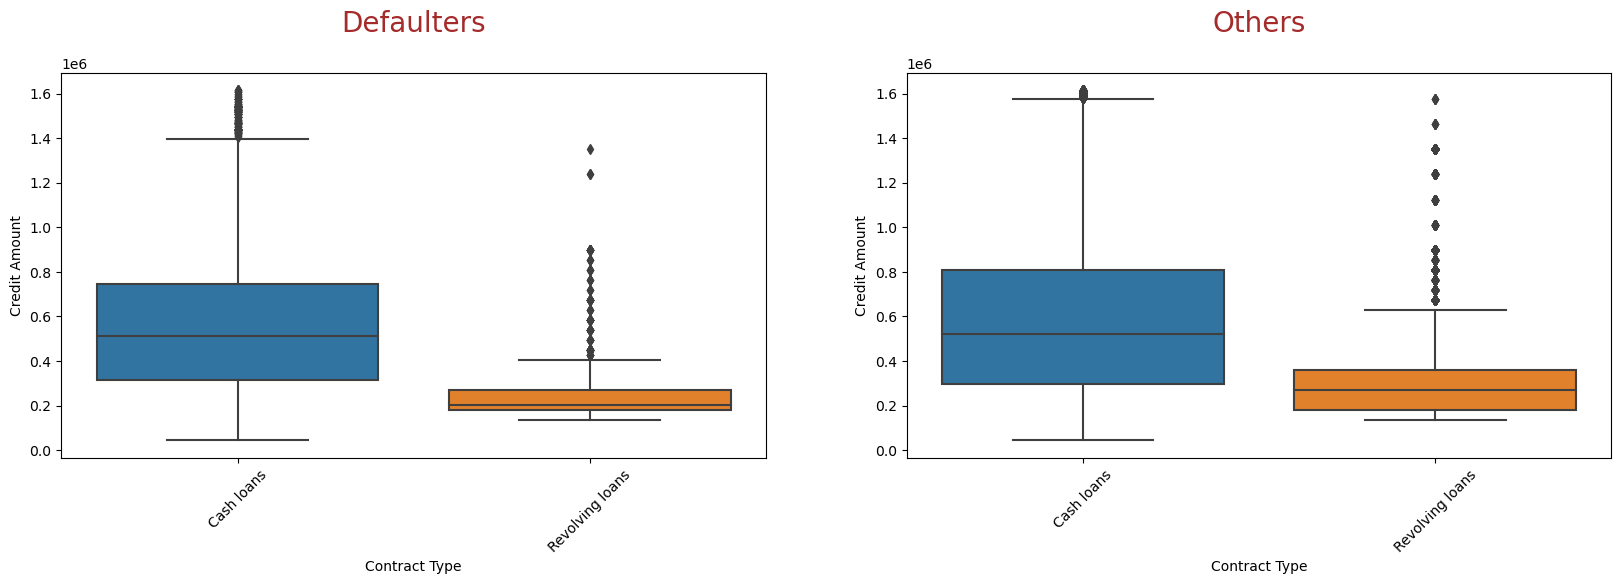

In [82]:
# NAME_CONTRACT_TYPE - AMT_CREDIT

var1 = 'NAME_CONTRACT_TYPE'
var2 = 'AMT_CREDIT'

xlabel = 'Contract Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

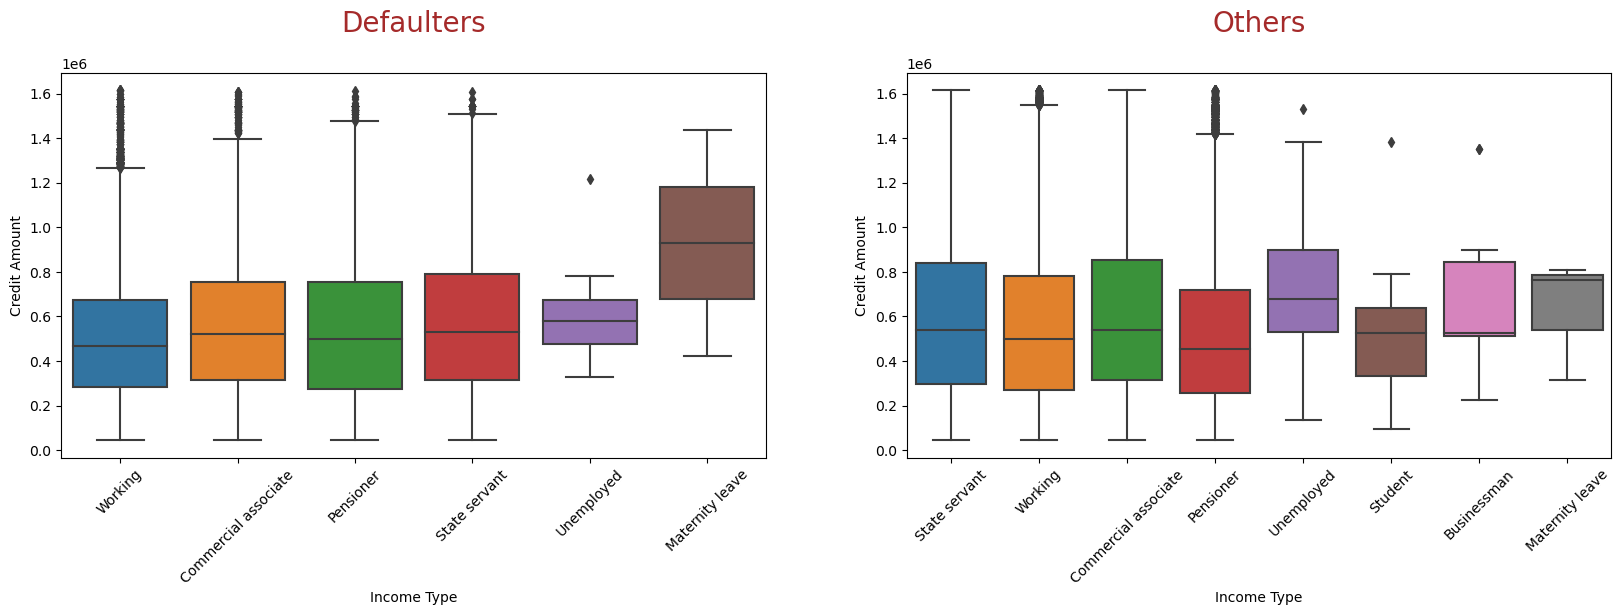

In [83]:
#NAME_INCOME_TYPE - AMT_CREDIT

var1 ='NAME_INCOME_TYPE'
var2 ='AMT_CREDIT'

xlabel = "Income Type"
ylabel = "Credit Amount"

cat_cont_plot(var1, var2, xlabel, ylabel)

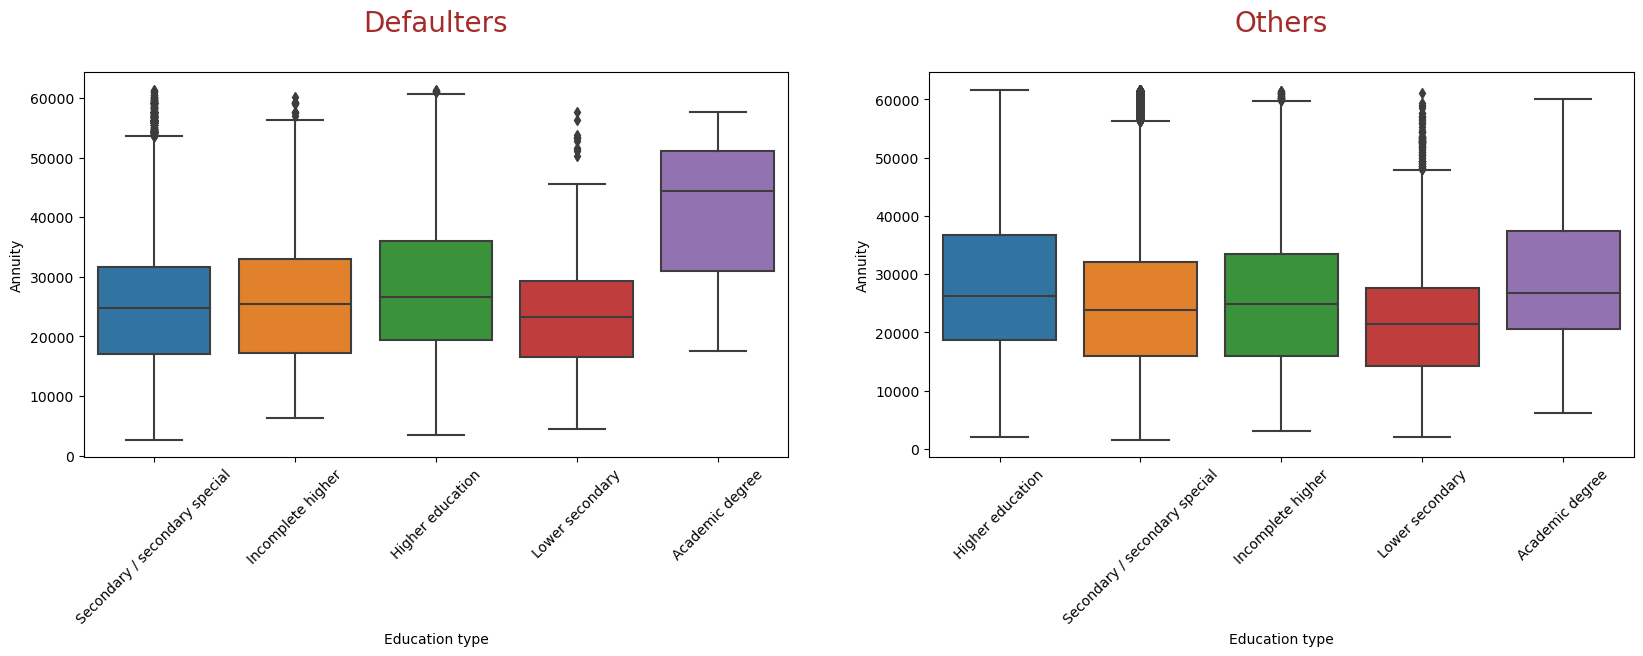

In [84]:
# NAME_EDUCATION_TYPE - AMT_ANNUITY

var1 = "NAME_EDUCATION_TYPE"
var2 = "AMT_ANNUITY"

xlabel = "Education type"
ylabel ="Annuity"

cat_cont_plot(var1, var2, xlabel, ylabel)

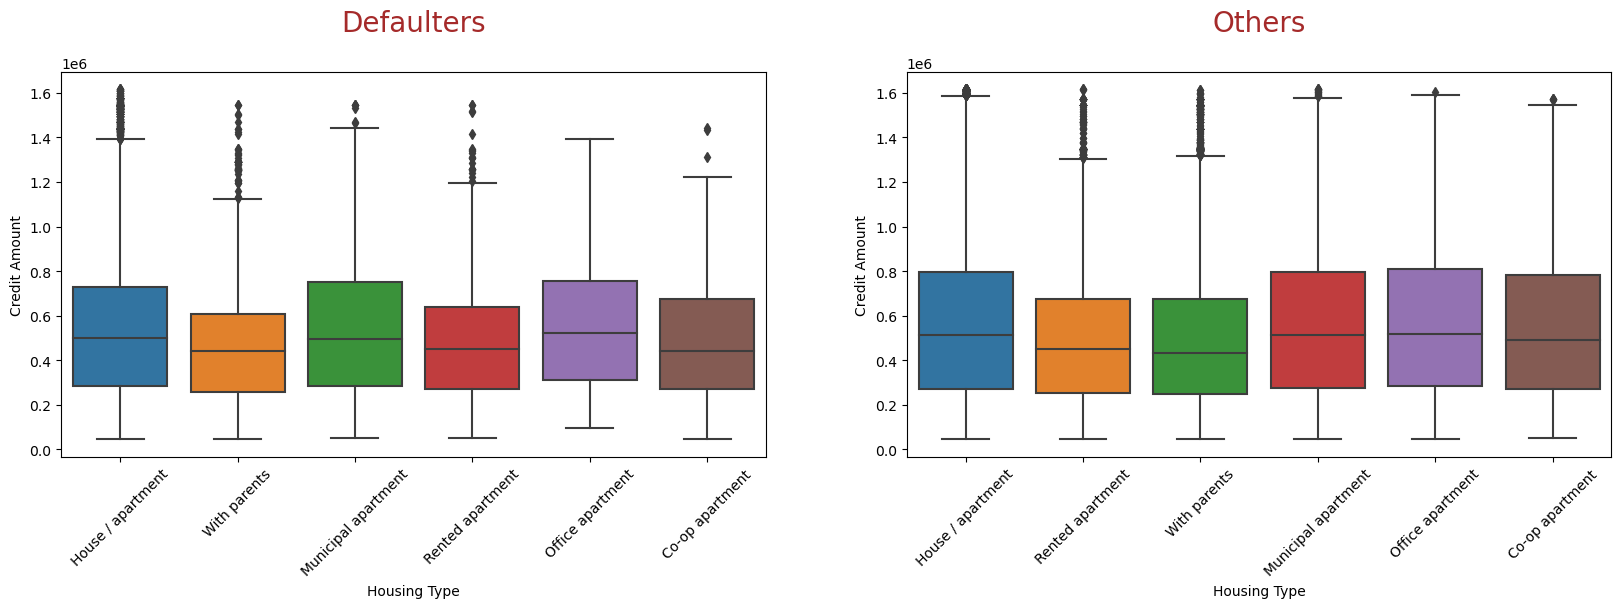

In [85]:
# NAME_HOUSING_TYPE - AMT_CREDIT

var1 = 'NAME_HOUSING_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Housing Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

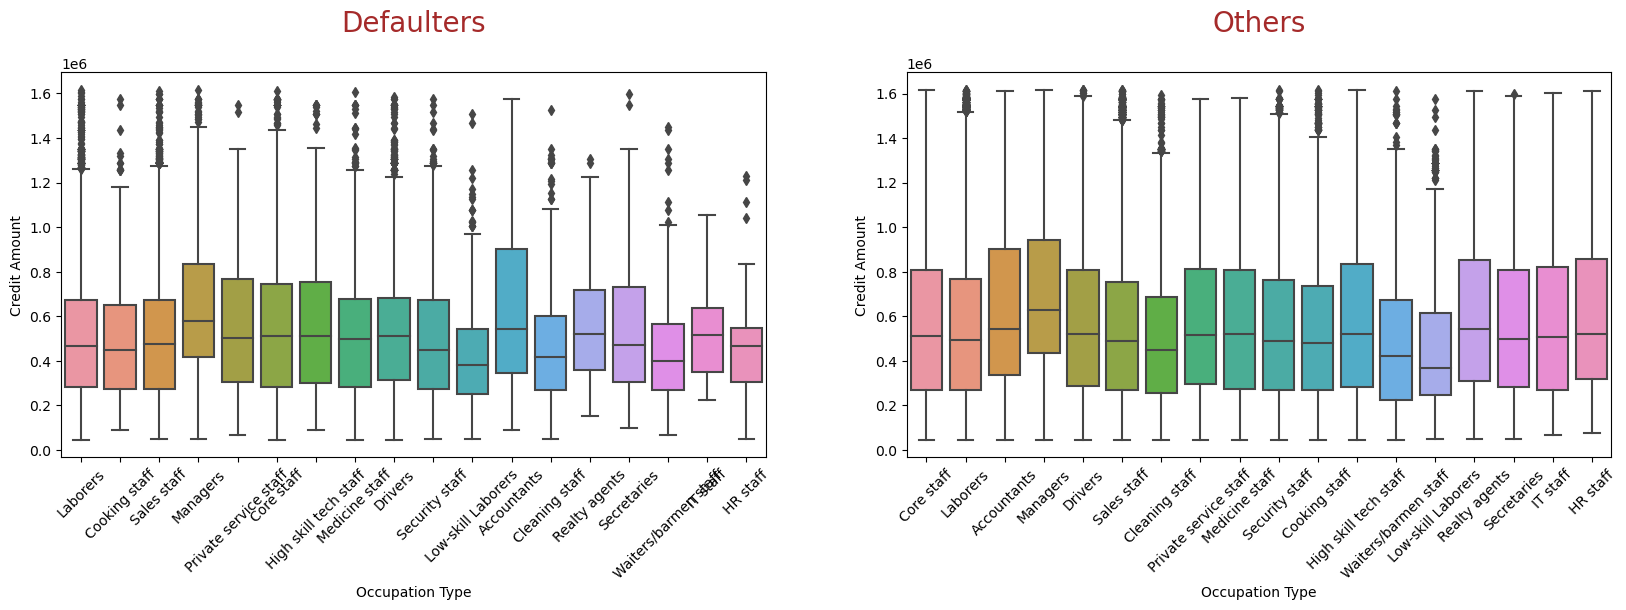

In [86]:
# OCCUPATION_TYPE - AMT_CREDIT

var1 = 'OCCUPATION_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Occupation Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

Continuous - Continuous Analysis
Here we have considered the below continuous value columns for plotting the graphs -

AMT_CREDIT,
AMT_ANNUITY,
AMT_GOODS_PRICE,
AMT_INCOME_TOTAL

In [87]:
# Defining function for Continuous - continuous plot

def cont_cont_plot(col1, col2, xlabel, ylabel):
    
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.scatterplot(x = col1, y = col2, data = ap_df1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.scatterplot(x = col1, y = col2, data = ap_df0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.show()

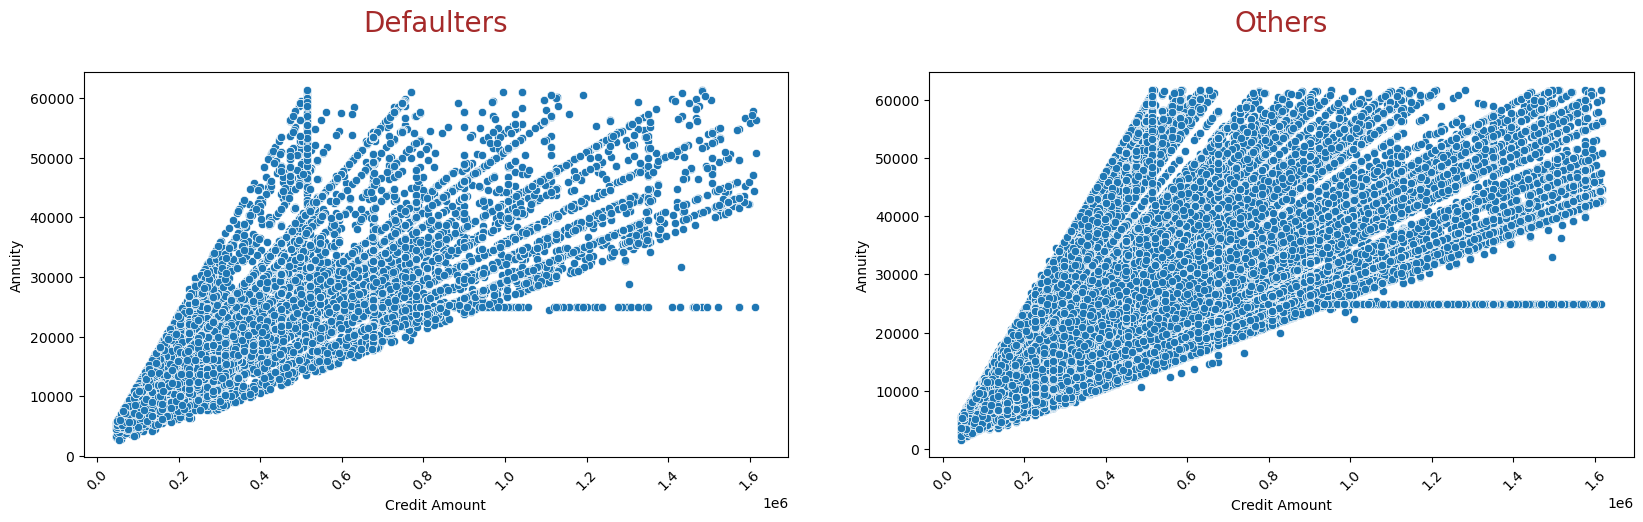

In [88]:
# AMT_CREDIT-AMT_ANNUITY

col1 = 'AMT_CREDIT'
col2 = 'AMT_ANNUITY'
xlabel = 'Credit Amount'
ylabel = 'Annuity'

cont_cont_plot(col1, col2, xlabel, ylabel)

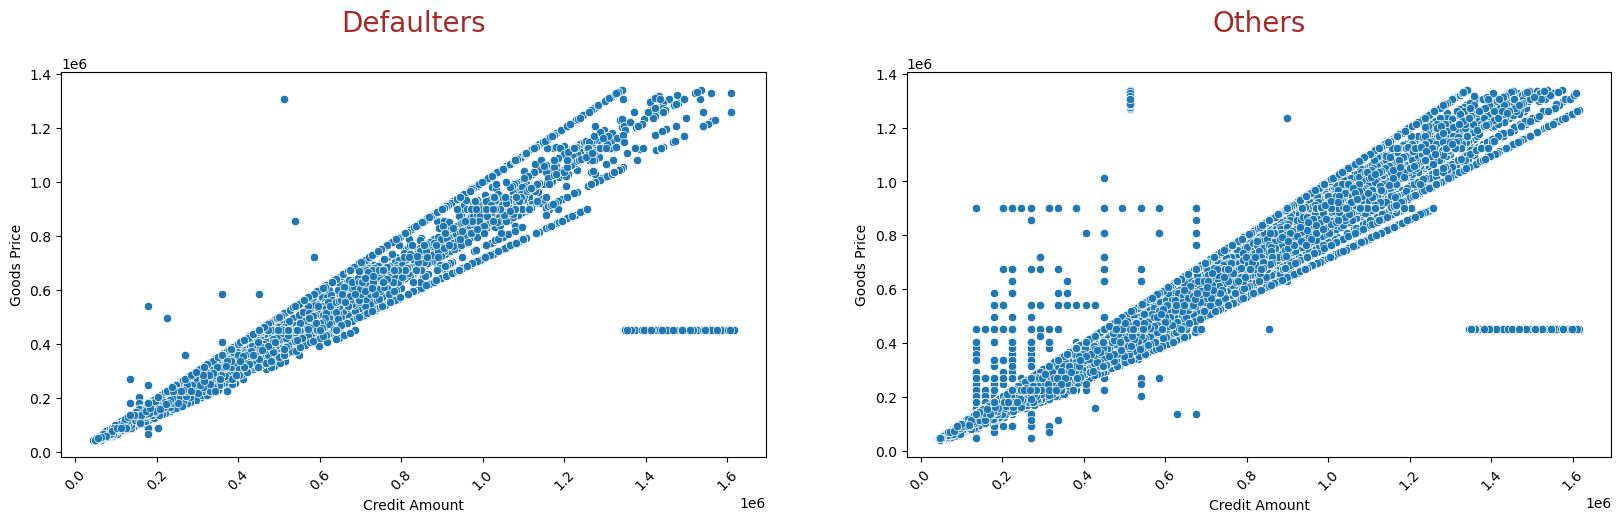

In [89]:
# AMT_CREDIT-AMT_GOODS_PRICE

col1 = 'AMT_CREDIT'
col2 = 'AMT_GOODS_PRICE'
xlabel = 'Credit Amount'
ylabel = 'Goods Price'

cont_cont_plot(col1, col2, xlabel, ylabel)

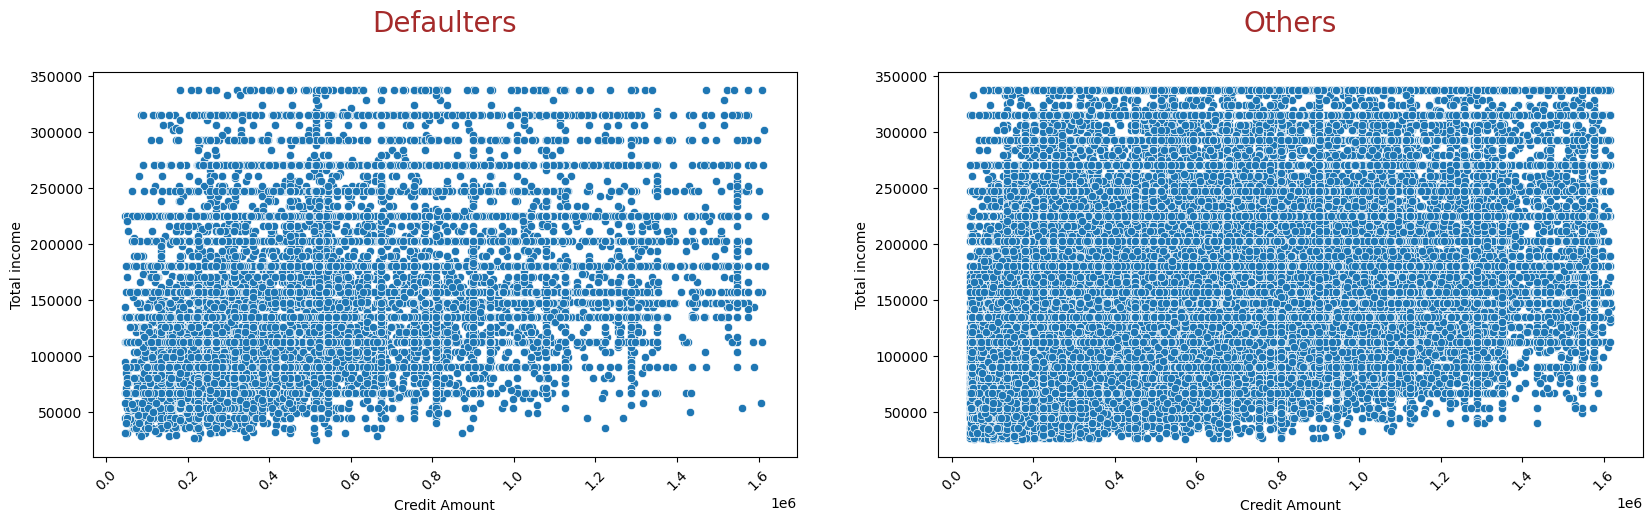

In [90]:
# AMT_CREDIT-AMT_INCOME_TOTAL

col1 = 'AMT_CREDIT'
col2 = 'AMT_INCOME_TOTAL'
xlabel = 'Credit Amount'
ylabel = 'Total income'

cont_cont_plot(col1, col2, xlabel, ylabel)

From the above analysis, we have gathered the below insights -

People who are more likely to default:-

Age : Young people – 25 to 35 age group

Income : Lower income group with a total income of less than 5 lakhs

Occupation : Low-skill labourers, drivers, waiters/barmen staff

Education : Lower / secondary education

Gender : Males

Income type : On maternity leave and unemployed

Family status : Civil marriage, single/unmarried

Housing type : Rented apartment or with parents

Contract type: Cash loan

Cash loan purpose : Repairs and urgent needs

Previous loan status : Approved

People who will repay on time:-

Age : Older people – above 50

Income : Higher income group

Occupation : Managers, High-skilled tech staff, Accountants

Education : Higher education and academic degree

Gender : Females

Income type : Working class, businessmen and students

Family status : Married

Housing type : Own house/apartment

Contract type: Revolving loan

Cash loan purpose : Buying garage, home etc.

Previous loan status : Unused offer

Hence, we can safely conclude that :-

Young males with lower secondary education and of lower income group and staying with parents or in a rented house, applying for low-range cash contract, should be denied.

Females are likely to repay but not if they are on maternity leave. Hence, bank can reduce the loan amount for female applicants who are on maternity leave.

Since people taking cash loans for repairs and urgent needs are more likely to default, bank can refuse them.

Since the people who have unused offers are more likely to default even though they have comparatively high total income, they can be offered loan at a higher interest rate.

Banks can target businessmen, students and working class people with academic degree/ higher education as they have no difficulty in repayment.

Bank can also approve loans taken on purpose for buying home or garage as there less chances of defaulting.